In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = 'ccc41077b9d4b0a0e2e2a2962b4d8539d61889cf'
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [9]:
# Could read in data directly after fetching in the first run and save as pickle below
# census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_index_free_df.pickle")
census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_df.pickle").reset_index()
census_occupation_gender_df.head()

Year State County                       Name  Population  Median Age  \
0   2010    36    005     Bronx County, New York   1386657.0        32.8   
1   2010    36    047     Kings County, New York   2508340.0        34.2   
2   2010    36    061  New York County, New York   1586698.0        36.4   
3   2010    36    081    Queens County, New York   2233841.0        37.3   
4   2010    36    085  Richmond County, New York    469363.0        38.7   
5   2011    36    005     Bronx County, New York   1392002.0        32.8   
6   2011    36    047     Kings County, New York   2532645.0        34.2   
7   2011    36    061  New York County, New York   1601948.0        36.5   
8   2011    36    081    Queens County, New York   2247848.0        37.4   
9   2011    36    085  Richmond County, New York    470467.0        38.6   
10  2012    36    005     Bronx County, New York   1408473.0        33.0   
11  2012    36    047     Kings County, New York   2565635.0        34.2   
12  2012    36    061  New York County, New York   1619090.0        36.5   
13  2012    36    081    Queens County, New York   2272771.0        37.5   
14  2012    36    085  Richmond County, New York    470728.0        38.9   
15  2013    36    005     Bronx County, New York   1418733.0        33.3   
16  2013    36    047     Kings County, New York   2592149.0        34.4   
17  2013    36    061  New York County, New York   1626159.0        36.7   
18  2013    36    081    Queens County, New York   2296175.0        37.7   
19  2013    36    085  Richmond County, New York    472621.0        39.6   
20  2014    36    005     Bronx County, New York   1438159.0        33.4   
21  2014    36    047     Kings County, New York   2621793.0        34.5   
22  2014    36    061  New York County, New York   1636268.0        36.6   
23  2014    36    081    Queens County, New York   2321580.0        37.8   
24  2014    36    085  Richmond County, New York    473279.0        39.7   
25  2015    36    005     Bronx County, New York   1455444.0        33.6   
26  2015    36    047     Kings County, New York   2636735.0        34.7   
27  2015    36    061  New York County, New York   1644518.0        36.8   
28  2015    36    081    Queens County, New York   2339150.0        38.1   
29  2015    36    085  Richmond County, New York    474558.0        39.8   
30  2016    36    005     Bronx County, New York   1455720.0        33.6   
31  2016    36    047     Kings County, New York   2629150.0        34.8   
32  2016    36    061  New York County, New York   1643734.0        37.1   
33  2016    36    081    Queens County, New York   2333054.0        38.3   
34  2016    36    085  Richmond County, New York    476015.0        39.7   
35  2017    36    005     Bronx County, New York   1471160.0        34.0   
36  2017    36    047     Kings County, New York   2648771.0        35.2   
37  2017    36    061  New York County, New York   1664727.0        37.3   
38  2017    36    081    Queens County, New York   2358582.0        38.7   
39  2017    36    085  Richmond County, New York    479458.0        40.4   
40  2018    36    061  New York County, New York   1628701.0        37.6   
41  2018    36    047     Kings County, New York   2582830.0        35.4   
42  2018    36    081    Queens County, New York   2278906.0        39.2   
43  2018    36    005     Bronx County, New York   1432132.0        34.4   
44  2018    36    085  Richmond County, New York    476179.0        40.1   

    Household Income  Per Capita Income  Poverty Count  Poverty Rate  ...  \
0            32568.0            16671.0       408584.0     29.465398  ...   
1            42143.0            23218.0       571936.0     22.801375  ...   
2            63832.0            56556.0       254289.0     16.026301  ...   
3            53054.0            24530.0       332165.0     14.869680  ...   
4            70560.0            30122.0        54353.0     11.580163  ...   
5            32058.0            16879.0      

In [21]:
software_devops = pd.DataFrame()

software_devops['Year']=census_occupation_gender_df['Year']
software_devops['Name']=census_occupation_gender_df['Name']
software_devops['County']=census_occupation_gender_df['County']
software_devops['Software_devops_male']=census_occupation_gender_df['Software_devops_male']
software_devops['Software_devops_female']=census_occupation_gender_df['Software_devops_female']

software_devops

Year                       Name County  Software_devops_male  \
0   2010     Bronx County, New York    005                 430.0   
1   2010     Kings County, New York    047                9372.0   
2   2010  New York County, New York    061                7622.0   
3   2010    Queens County, New York    081                4185.0   
4   2010  Richmond County, New York    085                 995.0   
5   2011     Bronx County, New York    005                 994.0   
6   2011     Kings County, New York    047                9963.0   
7   2011  New York County, New York    061                4917.0   
8   2011    Queens County, New York    081                6753.0   
9   2011  Richmond County, New York    085                1078.0   
10  2012     Bronx County, New York    005                1146.0   
11  2012     Kings County, New York    047                9372.0   
12  2012  New York County, New York    061                7959.0   
13  2012    Queens County, New York    081                6748.0   
14  2012  Richmond County, New York    085                1115.0   
15  2013     Bronx County, New York    005                 728.0   
16  2013     Kings County, New York    047                9112.0   
17  2013  New York County, New York    061                9701.0   
18  2013    Queens County, New York    081                6815.0   
19  2013  Richmond County, New York    085                 999.0   
20  2014     Bronx County, New York    005                 417.0   
21  2014     Kings County, New York    047               10016.0   
22  2014  New York County, New York    061                7335.0   
23  2014    Queens County, New York    081                6937.0   
24  2014  Richmond County, New York    085                 725.0   
25  2015     Bronx County, New York    005                1484.0   
26  2015     Kings County, New York    047               10376.0   
27  2015  New York County, New York    061               10863.0   
28  2015    Queens County, New York    081                6142.0   
29  2015  Richmond County, New York    085                1234.0   
30  2016     Bronx County, New York    005                 655.0   
31  2016     Kings County, New York    047               12250.0   
32  2016  New York County, New York    061               10396.0   
33  2016    Queens County, New York    081                7991.0   
34  2016  Richmond County, New York    085                1309.0   
35  2017     Bronx County, New York    005                 886.0   
36  2017     Kings County, New York    047               12181.0   
37  2017  New York County, New York    061               10229.0   
38  2017    Queens County, New York    081                9778.0   
39  2017  Richmond County, New York    085                2311.0   
40  2018  New York County, New York    061               13790.0   
41  2018     Kings County, New York    047               13841.0   
42  2018    Queens County, New York    081                6919.0   
43  2018     Bronx County, New York    005                1655.0   
44  2018  Richmond County, New York    085                2118.0   

    Software_devops_female  
0                    362.0  
1                   2111.0  
2                   1090.0  
3                   1310.0  
4                    765.0  
5                    182.0  
6                   2526.0  
7                   1650.0  
8                   2046.0  
9                    596.0  
10                   313.0  
11                  2676.0  
12                  2491.0  
13                  1310.0  
14                   746.0  
15                     0.0  
16                  2744.0  
17                  3490.0  
18                  2436.0  
19                   660.0  
20                   198.0  
21                  2549.0  
22                  2584.0  
23                  1709.0  
24                   633.0  
25                   370.0  
26                  3114.0  
27                  2480.0  
28                  2016.0  
29   

In [22]:
software_devops.set_index(['County','Year', 'Name'], inplace=True)
software_devops.sort_index()

Software_devops_male  \
County Year Name                                              
005    2010 Bronx County, New York                    430.0   
       2011 Bronx County, New York                    994.0   
       2012 Bronx County, New York                   1146.0   
       2013 Bronx County, New York                    728.0   
       2014 Bronx County, New York                    417.0   
       2015 Bronx County, New York                   1484.0   
       2016 Bronx County, New York                    655.0   
       2017 Bronx County, New York                    886.0   
       2018 Bronx County, New York                   1655.0   
047    2010 Kings County, New York                   9372.0   
       2011 Kings County, New York                   9963.0   
       2012 Kings County, New York                   9372.0   
       2013 Kings County, New York                   9112.0   
       2014 Kings County, New York                  10016.0   
       2015 Kings County, New York                  10376.0   
       2016 Kings County, New York                  12250.0   
       2017 Kings County, New York                  12181.0   
       2018 Kings County, New York                  13841.0   
061    2010 New York County, New York                7622.0   
       2011 New York County, New York                4917.0   
       2012 New York County, New York                7959.0   
       2013 New York County, New York                9701.0   
       2014 New York County, New York                7335.0   
       2015 New York County, New York               10863.0   
       2016 New York County, New York               10396.0   
       2017 New York County, New York               10229.0   
       2018 New York County, New York               13790.0   
081    2010 Queens County, New York                  4185.0   
       2011 Queens County, New York                  6753.0   
       2012 Queens County, New York                  6748.0   
       2013 Queens County, New York                  6815.0   
       2014 Queens County, New York                  6937.0   
       2015 Queens County, New York                  6142.0   
       2016 Queens County, New York                  7991.0   
       2017 Queens County, New York                  9778.0   
       2018 Queens County, New York                  6919.0   
085    2010 Richmond County, New York                 995.0   
       2011 Richmond County, New York                1078.0   
       2012 Richmond County, New York                1115.0   
       2013 Richmond County, New York                 999.0   
       2014 Richmond County, New York                 725.0   
       2015 Richmond County, New York                1234.0   
       2016 Richmond County, New York                1309.0   
       2017 Richmond County, New York                2311.0   
       2018 Richmond County, New York                2118.0   

                                       Software_devops_female  
County Year Name                                               
005    2010 Bronx County, New York                      362.0  
       2011 Bronx County, New York                      182.0  
       2012 Bronx County, New York                      313.0  
       2013 Bronx County, New York                        0.0  
       2014 Bronx County, New York                      198.0  
       2015 Bronx County, New York                      370.0  
       2016 Bronx County, New York                      306.0  
       2017 Bronx County, New York                      256.0  
       2018 Bronx County, New York                      229.0  
047    2010 Kings County, New York                     2111.0  
       2011 Kings County, New York                     2526.0  
       2012 Kings County, New York                     2676.0  
       2013 Kings County, New York                     2744.0  
       2014 Kings County, New York                     2549.0  
       2015 Kings County, New York                   

## Software Developers

In [23]:
software_devops_Bronx = software_devops.loc[['005']]
software_devops_Bronx

Software_devops_male  \
County Year Name                                           
005    2010 Bronx County, New York                 430.0   
       2011 Bronx County, New York                 994.0   
       2012 Bronx County, New York                1146.0   
       2013 Bronx County, New York                 728.0   
       2014 Bronx County, New York                 417.0   
       2015 Bronx County, New York                1484.0   
       2016 Bronx County, New York                 655.0   
       2017 Bronx County, New York                 886.0   
       2018 Bronx County, New York                1655.0   

                                    Software_devops_female  
County Year Name                                            
005    2010 Bronx County, New York                   362.0  
       2011 Bronx County, New York                   182.0  
       2012 Bronx County, New York                   313.0  
       2013 Bronx County, New York                     0.0  
       2014 Bronx County, New York                   198.0  
       2015 Bronx County, New York                   370.0  
       2016 Bronx County, New York                   306.0  
       2017 Bronx County, New York                   256.0  
       2018 Bronx County, New York                   229.0

In [24]:
software_devops_Brooklyn = software_devops.loc[['047']]
software_devops_Brooklyn 

Software_devops_male  \
County Year Name                                           
047    2010 Kings County, New York                9372.0   
       2011 Kings County, New York                9963.0   
       2012 Kings County, New York                9372.0   
       2013 Kings County, New York                9112.0   
       2014 Kings County, New York               10016.0   
       2015 Kings County, New York               10376.0   
       2016 Kings County, New York               12250.0   
       2017 Kings County, New York               12181.0   
       2018 Kings County, New York               13841.0   

                                    Software_devops_female  
County Year Name                                            
047    2010 Kings County, New York                  2111.0  
       2011 Kings County, New York                  2526.0  
       2012 Kings County, New York                  2676.0  
       2013 Kings County, New York                  2744.0  
       2014 Kings County, New York                  2549.0  
       2015 Kings County, New York                  3114.0  
       2016 Kings County, New York                  2856.0  
       2017 Kings County, New York                  3866.0  
       2018 Kings County, New York                  3085.0

In [25]:
software_devops_Manhattan = software_devops.loc[['061']]
software_devops_Manhattan 

Software_devops_male  \
County Year Name                                              
061    2010 New York County, New York                7622.0   
       2011 New York County, New York                4917.0   
       2012 New York County, New York                7959.0   
       2013 New York County, New York                9701.0   
       2014 New York County, New York                7335.0   
       2015 New York County, New York               10863.0   
       2016 New York County, New York               10396.0   
       2017 New York County, New York               10229.0   
       2018 New York County, New York               13790.0   

                                       Software_devops_female  
County Year Name                                               
061    2010 New York County, New York                  1090.0  
       2011 New York County, New York                  1650.0  
       2012 New York County, New York                  2491.0  
       2013 New York County, New York                  3490.0  
       2014 New York County, New York                  2584.0  
       2015 New York County, New York                  2480.0  
       2016 New York County, New York                  1465.0  
       2017 New York County, New York                  1592.0  
       2018 New York County, New York                  2287.0

In [26]:
software_devops_Queens = software_devops.loc[['081']]
software_devops_Queens

Software_devops_male  \
County Year Name                                            
081    2010 Queens County, New York                4185.0   
       2011 Queens County, New York                6753.0   
       2012 Queens County, New York                6748.0   
       2013 Queens County, New York                6815.0   
       2014 Queens County, New York                6937.0   
       2015 Queens County, New York                6142.0   
       2016 Queens County, New York                7991.0   
       2017 Queens County, New York                9778.0   
       2018 Queens County, New York                6919.0   

                                     Software_devops_female  
County Year Name                                             
081    2010 Queens County, New York                  1310.0  
       2011 Queens County, New York                  2046.0  
       2012 Queens County, New York                  1310.0  
       2013 Queens County, New York                  2436.0  
       2014 Queens County, New York                  1709.0  
       2015 Queens County, New York                  2016.0  
       2016 Queens County, New York                  2150.0  
       2017 Queens County, New York                  1731.0  
       2018 Queens County, New York                  1021.0

In [27]:
software_devops_Staten_Island = software_devops.loc[['085']]
software_devops_Staten_Island

Software_devops_male  \
County Year Name                                              
085    2010 Richmond County, New York                 995.0   
       2011 Richmond County, New York                1078.0   
       2012 Richmond County, New York                1115.0   
       2013 Richmond County, New York                 999.0   
       2014 Richmond County, New York                 725.0   
       2015 Richmond County, New York                1234.0   
       2016 Richmond County, New York                1309.0   
       2017 Richmond County, New York                2311.0   
       2018 Richmond County, New York                2118.0   

                                       Software_devops_female  
County Year Name                                               
085    2010 Richmond County, New York                   765.0  
       2011 Richmond County, New York                   596.0  
       2012 Richmond County, New York                   746.0  
       2013 Richmond County, New York                   660.0  
       2014 Richmond County, New York                   633.0  
       2015 Richmond County, New York                   330.0  
       2016 Richmond County, New York                   355.0  
       2017 Richmond County, New York                   442.0  
       2018 Richmond County, New York                   269.0

## Forecast on Full-Time Male Software Developers Employment for Each Borough of NYC
### Monte Carlo Simulation on Software Developers in Manhattan Over 30 Years From 2018

In [28]:
# Get 9 year's worth of historical data
manhattan_software_df = software_devops_Manhattan
manhattan_software_df

Software_devops_male  \
County Year Name                                              
061    2010 New York County, New York                7622.0   
       2011 New York County, New York                4917.0   
       2012 New York County, New York                7959.0   
       2013 New York County, New York                9701.0   
       2014 New York County, New York                7335.0   
       2015 New York County, New York               10863.0   
       2016 New York County, New York               10396.0   
       2017 New York County, New York               10229.0   
       2018 New York County, New York               13790.0   

                                       Software_devops_female  
County Year Name                                               
061    2010 New York County, New York                  1090.0  
       2011 New York County, New York                  1650.0  
       2012 New York County, New York                  2491.0  
       2013 New York County, New York                  3490.0  
       2014 New York County, New York                  2584.0  
       2015 New York County, New York                  2480.0  
       2016 New York County, New York                  1465.0  
       2017 New York County, New York                  1592.0  
       2018 New York County, New York                  2287.0

In [29]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [30]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves_manhattan = manhattan_software_df.pct_change().fillna(0)
annual_moves_manhattan

Software_devops_male  \
County Year Name                                              
061    2010 New York County, New York              0.000000   
       2011 New York County, New York             -0.354894   
       2012 New York County, New York              0.618670   
       2013 New York County, New York              0.218872   
       2014 New York County, New York             -0.243892   
       2015 New York County, New York              0.480982   
       2016 New York County, New York             -0.042990   
       2017 New York County, New York             -0.016064   
       2018 New York County, New York              0.348128   

                                       Software_devops_female  
County Year Name                                               
061    2010 New York County, New York                0.000000  
       2011 New York County, New York                0.513761  
       2012 New York County, New York                0.509697  
       2013 New York County, New York                0.401044  
       2014 New York County, New York               -0.259599  
       2015 New York County, New York               -0.040248  
       2016 New York County, New York               -0.409274  
       2017 New York County, New York                0.086689  
       2018 New York County, New York                0.436558

In [31]:
# Use the `mean` function to calculate the mean of market moves for `male` and `female`, respectively
avg_annual_moves_software_devops_male_manhattan = annual_moves_manhattan.mean()['Software_devops_male']
avg_annual_moves_software_devops_female_manhattan = annual_moves_manhattan.mean()['Software_devops_female']
avg_annual_moves_software_devops_male_manhattan

0.11209012861081498

In [32]:
avg_annual_moves_software_devops_female_manhattan

0.13762540871319592

In [33]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_software_devops_male_manhattan = annual_moves_manhattan.std()['Software_devops_male']
std_dev_annual_moves_software_devops_female_manhattan = annual_moves_manhattan.std()['Software_devops_female']
std_dev_annual_moves_software_devops_female_manhattan

0.34437002786970305

In [34]:
std_dev_annual_moves_software_devops_male_manhattan

0.3274246239388472

In [39]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
software_devops_male_last_manhattan  = manhattan_software_df['Software_devops_male'][-1]
software_devops_female_last_manhattan = manhattan_software_df['Software_devops_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_software_df_manhattan = pd.DataFrame()
software_cumulative_moves_manhattan = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_software_devop_male_manhattan = []
    simulated_software_devop_female_manhattan = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_software_devops_male_manhattan = [software_devops_male_last_manhattan]
    simulated_software_devops_female_manhattan = [software_devops_female_last_manhattan]
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_software_devop_male_manhattan = simulated_software_devops_male_manhattan[count] * (1 + np.random.normal(avg_annual_moves_software_devops_male_manhattan, std_dev_annual_moves_software_devops_male_manhattan))
        simulated_software_devop_female_manhattan = simulated_software_devops_female_manhattan[count] * (1 + np.random.normal(avg_annual_moves_software_devops_female_manhattan, std_dev_annual_moves_software_devops_female_manhattan))

        simulated_software_devops_male_manhattan.append(simulated_software_devop_male_manhattan)
        simulated_software_devops_female_manhattan.append(simulated_software_devop_female_manhattan)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_software_df_manhattan['Software_devops_male'] = simulated_software_devops_male_manhattan
    simulated_software_df_manhattan['Software_devops_female'] = simulated_software_devops_female_manhattan
    
    # Calculate the daily returns of simulated prices
    simulated_software_moves_manhattan = simulated_software_df_manhattan.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    software_annual_moves_manhattan = simulated_software_moves_manhattan.dot(weights)
    
    # Calculate the normalized, cumulative return series
    software_cumulative_moves_manhattan[n] = (1 + software_annual_moves_manhattan.fillna(0)).cumprod()

# Print records from the DataFrame
software_cumulative_moves_manhattan

0         1         2          3          4          5          6    \
0   1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1   1.419319  0.480999  1.062262   1.512026   1.728583   1.534717   0.773109   
2   1.948162  0.567608  0.970943   2.116480   3.363232   1.761726   0.359413   
3   2.047746  0.641647  1.722929   1.206781   3.376558   1.159698   0.476198   
4   1.857631  0.883763  1.867690   1.385654   1.506615   0.740010   0.404840   
5   1.660820  1.291320  2.224061   1.245902   1.321167   0.671616   0.169147   
6   2.326278  1.525021  3.325558   1.917038   1.502305   0.526423   0.136969   
7   1.479463  1.323670  2.395018   1.322037   1.816730   0.556222   0.213329   
8   1.429562  1.172945  1.845824   1.570456   2.386995   0.832108   0.262301   
9   2.019922  1.595963  1.016886   2.239441   2.513194   1.310619   0.325822   
10  1.707072  1.693801  0.916570   2.349483   1.714337   1.017536   0.336523   
11  1.171880  2.187694  0.594163   2.591000   2.267086   1.598813   0.504653   
12  1.110803  2.576537  0.844840   4.270690   3.665253   3.128392   0.563403   
13  1.173872  2.721700  0.905886   4.386761   5.941366   3.818790   0.705050   
14  1.324658  2.393544  1.674865   6.180114   8.534562   6.032253   0.979781   
15  1.612469  2.843619  2.188351   7.099866  11.572521   6.209995   0.702820   
16  1.751167  4.360221  1.965712   7.661195  13.398248   5.552534   1.017964   
17  1.911372  3.357659  1.426118   4.817315  15.470928   6.374575   2.085194   
18  1.765666  2.922411  1.592617   4.687239  19.561521   8.290077   2.300142   
19  2.025051  1.950603  1.567239   6.090403  22.945089   8.748399   2.927310   
20  3.599696  2.074369  1.517041   5.535260  24.315133   9.683338   3.021047   
21  0.997725  1.398187  2.187952   6.473771  35.305853  12.091453   3.966574   
22  1.084955  1.302727  1.603169   9.359105  42.905239  16.853928   6.353526   
23  0.195903  1.352249  1.748695  16.802255  53.430334  23.923130   6.853829   
24  0.206272  0.836047  2.251429  14.767654  41.138814  30.504811   7.492024   
25  0.219533  1.381361  2.374178  11.360440  35.131996  22.462914   9.027474   
26  0.366502  2.339480  2.836574  10.960453  50.517521  37.859634  11.219224   
27  0.384281  2.163565  3.250937  18.646436  51.315988  61.036806  13.443020   
28  0.436895  1.349883  4.724552  10.861113  43.334733  49.651537  11.379124   
29  0.423328  1.412765  7.285897  14.650742  37.470274  55.995979  18.538894   
30  0.828175  1.076651  9.764347  11.771890  64.651415  74.389624  14.052984   

         7         8         9    ...        990       991        992  \
0   1.000000  1.000000  1.000000  ...   1.000000  1.000000   1.000000   
1   0.596848  1.040886  1.020346  ...   0.553656  1.057735   0.966511   
2   0.665783  0.824081  1.684346  ...   0.622803  0.987177   0.806314   
3   0.918948  0.700674  1.372564  ...   0.605931  1.289152   0.621726   
4   1.541355  0.553476  1.468489  ...   0.944270  1.390427   1.078549   
5   1.565054  0.337323  2.384437  ...   1.224587  0.590400   1.529034   
6   1.415878  0.405221  2.509893  ...   1.390619  0.706435   1.730968   
7   2.162381  0.355693  3.978044  ...   1.603751  0.945652   2.045887   
8   2.274800  0.476265  4.154982  ...   2.856860  0.682497   2.041263   
9   2.144160  0.469255  7.188738  ...   2.476086  0.657405   1.553539   
10  2.128196  0.565234  4.444807  ...   3.781820  1.005959   1.421389   
11  2.067766  0.654744  6.333685  ...   3.230059  1.133214   2.253581   
12  1.651184  0.797198  5.823591  ...   3.975170  1.286692   2.759068   
13  2.314436  1.140315  5.072451  ...   3.128731  2.081996   4.295653   
14  2.051192  1.166083  4.359772  ...   2.581972  1.289967   3.893852   
15  1.348141  1.121554  4.359688  ...   3.412853  1.615386   2.597878   
16  1.685522  1.185681  5.315638  ...   4.095427  2.501684   3.712133   
17  2.527558  0.481033  3.259293  ...   5.088756  3.228355   3.266225   
18  2.437321  0.563541  3.239389  ...   5.176019  1.808086   

<Figure size 432x288 with 0 Axes>

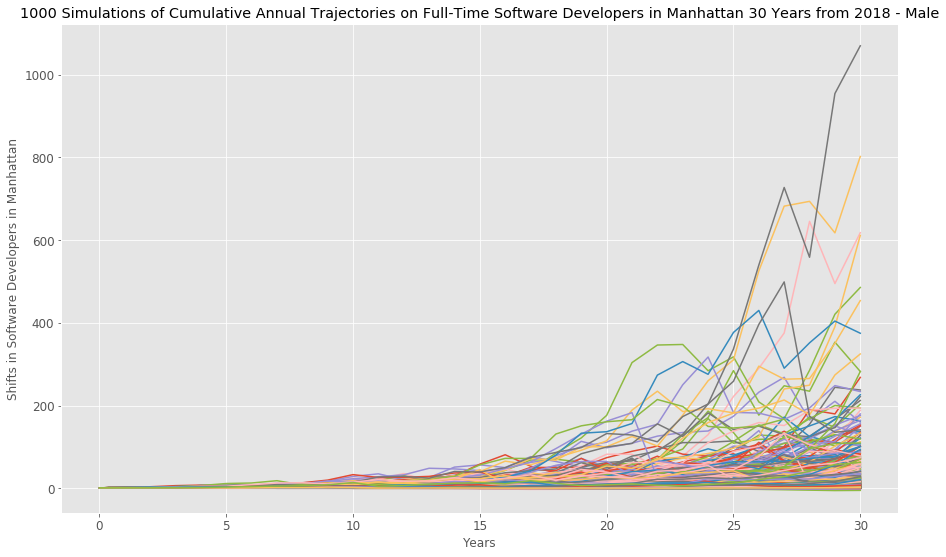

In [40]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_manhattan = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Manhattan 30 Years from 2018 - Male"
software_cumulative_moves_manhattan.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Manhattan')
plt.show()

<Figure size 432x288 with 0 Axes>

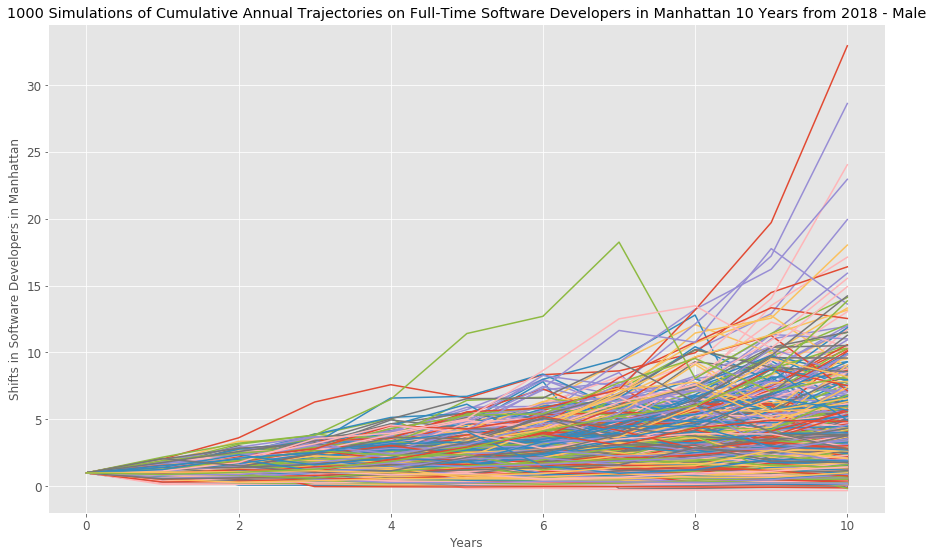

In [41]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_manhattan_decade = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Manhattan 10 Years from 2018 - Male"
software_cumulative_moves_manhattan.iloc[0:11, :].plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Manhattan')
plt.show()

In [42]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_software_cumulative_moves_manhattan = software_cumulative_moves_manhattan.iloc[-1, :]
ending_software_cumulative_moves_manhattan.head()

0     0.828175
1     1.076651
2     9.764347
3    11.771890
4    64.651415
Name: 30, dtype: float64

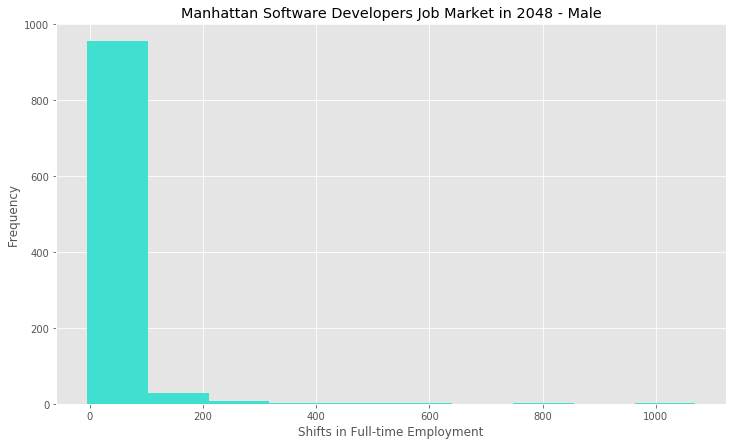

In [44]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_software_manhattan = plt.figure()
ending_software_cumulative_moves_manhattan.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Software Developers Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [45]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_software_cumulative_moves_manhattan.value_counts(bins=10) / len(ending_software_cumulative_moves_manhattan)

(-6.251, 102.335]      0.955
(102.335, 209.845]     0.029
(209.845, 317.355]     0.008
(532.375, 639.885]     0.002
(424.865, 532.375]     0.002
(317.355, 424.865]     0.002
(962.414, 1069.924]    0.001
(747.394, 854.904]     0.001
(854.904, 962.414]     0.000
(639.885, 747.394]     0.000
Name: 30, dtype: float64

In [46]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_software_manhattan = ending_software_cumulative_moves_manhattan.quantile(q=[0.025, 0.975])
confidence_interval_software_manhattan

0.025      0.050763
0.975    159.997722
Name: 30, dtype: float64

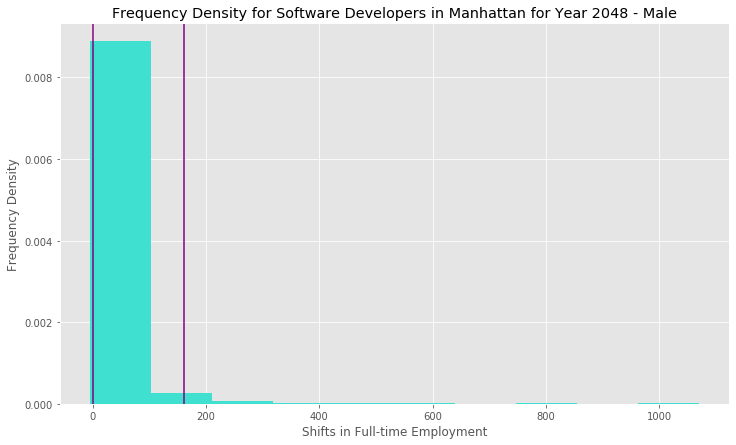

In [48]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_software_manhattan = plt.figure()
ending_software_cumulative_moves_manhattan.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Software Developers in Manhattan for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_software_manhattan.iloc[0], color='purple')
plt.axvline(confidence_interval_software_manhattan.iloc[1], color='purple')
plt.show()

In [49]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_software_cumulative_moves_manhattan = software_cumulative_moves_manhattan.iloc[-20, :]
tenth_software_cumulative_moves_manhattan.head()

0    1.171880
1    2.187694
2    0.594163
3    2.591000
4    2.267086
Name: 11, dtype: float64

In [50]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
tenth_software_cumulative_moves_manhattan.value_counts(bins=10) / len(tenth_software_cumulative_moves_manhattan)

(-0.439, 3.124]     0.651
(3.124, 6.651]      0.225
(6.651, 10.178]     0.069
(10.178, 13.704]    0.030
(13.704, 17.231]    0.012
(17.231, 20.757]    0.005
(20.757, 24.284]    0.004
(24.284, 27.811]    0.002
(31.337, 34.864]    0.001
(27.811, 31.337]    0.001
Name: 11, dtype: float64

In [51]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_software_confidence_interval_manhattan = tenth_software_cumulative_moves_manhattan.quantile(q=[0.025, 0.975])
tenth_software_confidence_interval_manhattan

0.025     0.149171
0.975    13.330686
Name: 11, dtype: float64

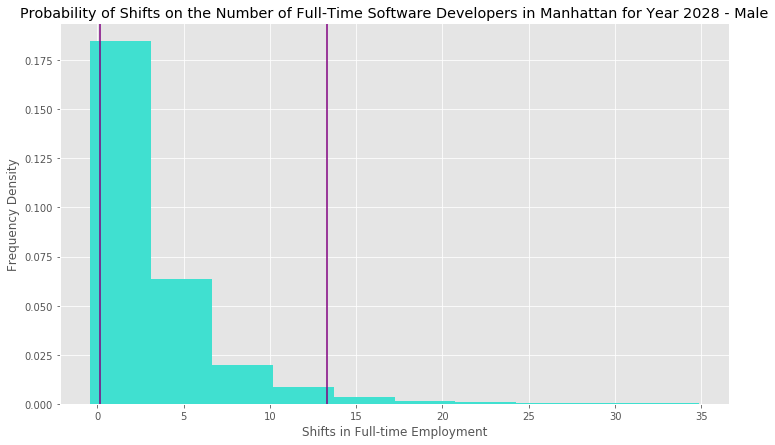

In [53]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_software_cum_moves_manhattan = plt.figure()
tenth_software_cumulative_moves_manhattan.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Probability of Shifts on the Number of Full-Time Software Developers in Manhattan for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_software_confidence_interval_manhattan.iloc[0], color='purple')
plt.axvline(tenth_software_confidence_interval_manhattan.iloc[1], color='purple')
plt.show()

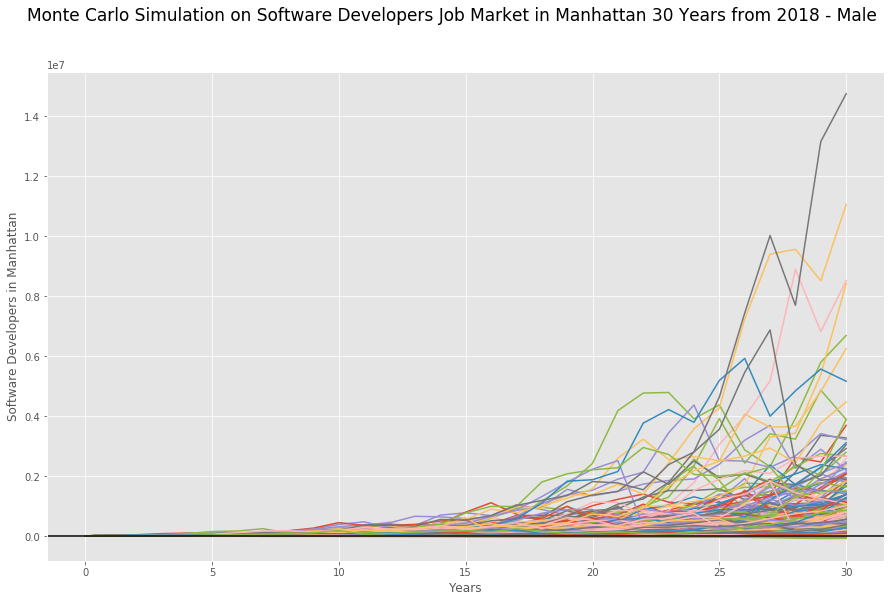

In [90]:
# Set initial employment
initial_software_manhattan = software_devops_male_last_manhattan 

fig_software_manhattan = plt.figure(figsize=(15,9))
fig_software_manhattan.suptitle('Monte Carlo Simulation on Software Developers Job Market in Manhattan 30 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_manhattan * initial_software_manhattan)
plt.axhline(y = software_devops_male_last_manhattan, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_manhattan, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Manhattan')
plt.show()

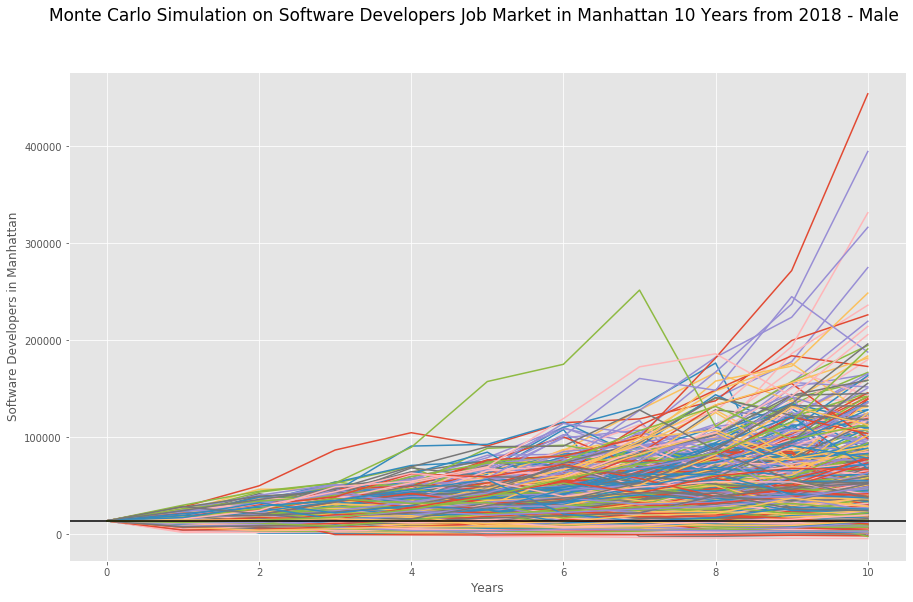

In [91]:
fig_software_manhattan_decade = plt.figure(figsize=(15,9))
fig_software_manhattan_decade.suptitle('Monte Carlo Simulation on Software Developers Job Market in Manhattan 10 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_manhattan.iloc[0:11, :] * initial_software_manhattan)
plt.axhline(y = software_devops_male_last_manhattan, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_manhattan, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Manhattan')
plt.show()

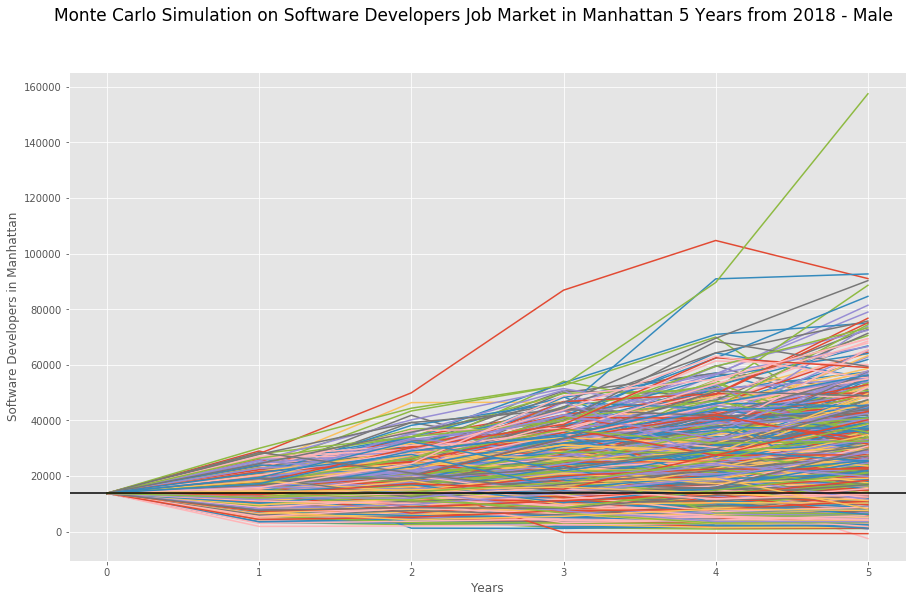

In [92]:
# In the next five years
fig_software_manhattan_decade = plt.figure(figsize=(15,9))
fig_software_manhattan_decade.suptitle('Monte Carlo Simulation on Software Developers Job Market in Manhattan 5 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_manhattan.iloc[0:6, :] * initial_software_manhattan)
plt.axhline(y = software_devops_male_last_manhattan, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_manhattan, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Manhattan')
plt.show()

In [110]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
software_gnl_lower_bound_manhattan = initial_software_manhattan * confidence_interval_software_manhattan.iloc[0]
software_gnl_upper_bound_manhattan = initial_software_manhattan * confidence_interval_software_manhattan.iloc[1]
                                                    
# Print the results
print(f"Thirty years from 2018, there is a 95% chance that an {initial_software_manhattan:,.0f} initial employment on male software developers"
      f" in Manhattan will end up within the range of"
      f" {software_gnl_lower_bound_manhattan:,.0f} and {software_gnl_upper_bound_manhattan:,.0f}.")

Thirty years from 2018, there is a 95% chance that an 13,790 initial employment on male software developers in Manhattan will end up within the range of 700 and 2,206,369.


In [111]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_software_gnl_lower_bound_manhattan = initial_software_manhattan * tenth_software_confidence_interval_manhattan.iloc[0]
tenth_software_gnl_upper_bound_manhattan = initial_software_manhattan * tenth_software_confidence_interval_manhattan.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an {initial_software_manhattan:,.0f} initial employment on male software developers"
      f" in 2018 will end up in 2028 within the range of"
      f" {tenth_software_gnl_lower_bound_manhattan:,.0f} and {tenth_software_gnl_upper_bound_manhattan:,.0f}.")

There is a 95% chance that an 13,790 initial employment on male software developers in 2018 will end up in 2028 within the range of 2,057 and 183,830.


In [95]:
software_trajectories_manhattan = initial_software_manhattan * software_cumulative_moves_manhattan.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
software_trajectories_manhattan.columns = ['Lower 5%', 'Median', 'Upper 5%']
software_trajectories_manhattan

Lower 5%        Median      Upper 5%
0   13790.000000  13790.000000  1.379000e+04
1    7460.719862  15421.760784  2.235594e+04
2    6267.062858  16528.410076  2.902956e+04
3    5460.901115  17572.360391  3.803548e+04
4    4922.918757  18399.339973  4.695213e+04
5    4434.343030  19382.244310  5.551654e+04
6    4037.332402  20707.395460  6.751866e+04
7    3475.176631  21603.451231  8.249833e+04
8    3294.701608  22353.785020  9.285225e+04
9    3450.222266  23964.282870  1.196623e+05
10   3229.499679  24996.219327  1.246162e+05
11   3247.109943  27038.882082  1.484104e+05
12   3265.331819  29317.991291  1.624126e+05
13   3567.383436  30719.503830  1.886060e+05
14   3399.316730  31940.540538  2.138781e+05
15   2746.672952  34761.562101  2.300890e+05
16   2581.096292  36583.999284  2.662411e+05
17   2639.395712  37805.818786  2.828843e+05
18   2252.288634  39315.445499  2.961681e+05
19   2227.825343  40437.619449  3.579754e+05
20   2401.074146  44977.974027  3.828688e+05
21   2345.876512  50116.708636  4.300444e+05
22   2542.697463  51162.268360  5.486306e+05
23   2759.580260  56320.171019  5.603284e+05
24   2607.296427  58692.904797  6.497224e+05
25   2098.519023  60585.571240  7.398887e+05
26   2158.909108  65248.786306  8.020153e+05
27   2146.780405  67358.424096  9.053314e+05
28   2325.886619  67371.873047  9.965268e+05
29   2382.936591  74255.918493  1.104494e+06
30   2752.875912  77301.216059  1.267555e+06

<Figure size 432x288 with 0 Axes>

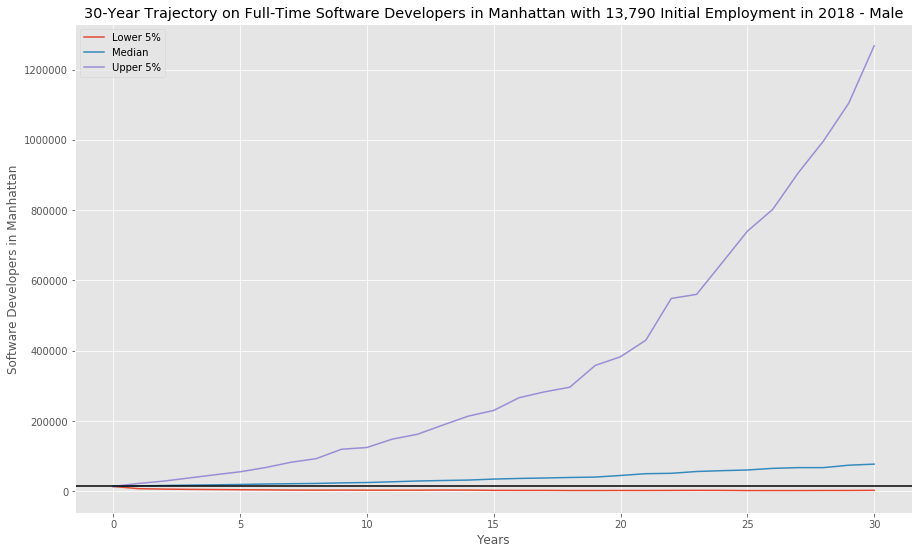

In [112]:
ax_cum_software_manhattan = plt.figure()
software_trajectories_manhattan.plot(title="30-Year Trajectory on Full-Time Software Developers in Manhattan with 13,790 Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = software_devops_male_last_manhattan, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_manhattan, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Manhattan')
plt.show()

<Figure size 432x288 with 0 Axes>

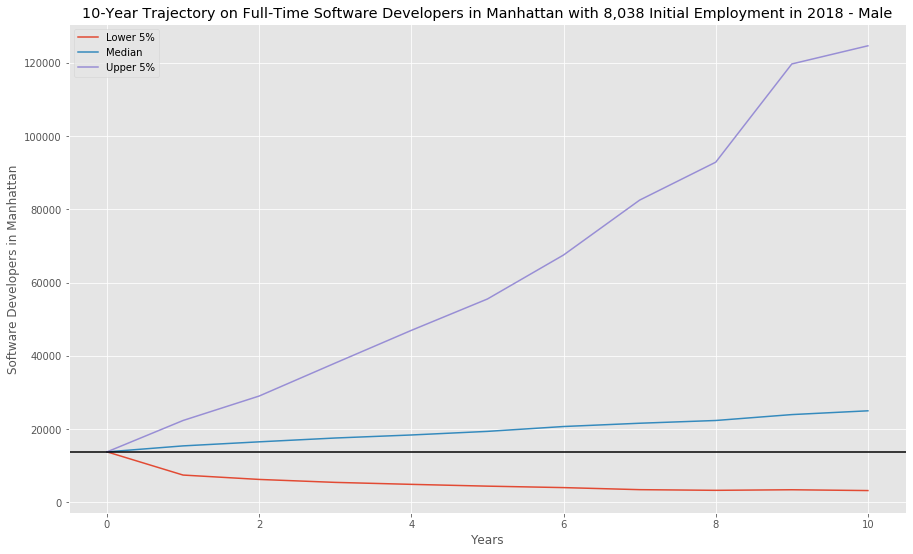

In [97]:
ax_cum_software_manhattan_decade = plt.figure()
software_trajectories_manhattan.iloc[0:11, :].plot(title="10-Year Trajectory on Full-Time Software Developers in Manhattan with 8,038 Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = software_devops_male_last_manhattan, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_manhattan, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Manhattan')
plt.show()

### Monte Carlo Simulation on Financial Specialists in Bronx Over 30 Years From 2018

In [66]:
software_df_bronx = software_devops_Bronx
software_df_bronx

Software_devops_male  \
County Year Name                                           
005    2010 Bronx County, New York                 430.0   
       2011 Bronx County, New York                 994.0   
       2012 Bronx County, New York                1146.0   
       2013 Bronx County, New York                 728.0   
       2014 Bronx County, New York                 417.0   
       2015 Bronx County, New York                1484.0   
       2016 Bronx County, New York                 655.0   
       2017 Bronx County, New York                 886.0   
       2018 Bronx County, New York                1655.0   

                                    Software_devops_female  
County Year Name                                            
005    2010 Bronx County, New York                   362.0  
       2011 Bronx County, New York                   182.0  
       2012 Bronx County, New York                   313.0  
       2013 Bronx County, New York                     0.0  
       2014 Bronx County, New York                   198.0  
       2015 Bronx County, New York                   370.0  
       2016 Bronx County, New York                   306.0  
       2017 Bronx County, New York                   256.0  
       2018 Bronx County, New York                   229.0

In [67]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_software_bronx = software_df_bronx.pct_change().fillna(0)
annual_moves_software_bronx

Software_devops_male  \
County Year Name                                           
005    2010 Bronx County, New York              0.000000   
       2011 Bronx County, New York              1.311628   
       2012 Bronx County, New York              0.152918   
       2013 Bronx County, New York             -0.364747   
       2014 Bronx County, New York             -0.427198   
       2015 Bronx County, New York              2.558753   
       2016 Bronx County, New York             -0.558625   
       2017 Bronx County, New York              0.352672   
       2018 Bronx County, New York              0.867946   

                                    Software_devops_female  
County Year Name                                            
005    2010 Bronx County, New York                0.000000  
       2011 Bronx County, New York               -0.497238  
       2012 Bronx County, New York                0.719780  
       2013 Bronx County, New York               -1.000000  
       2014 Bronx County, New York                     inf  
       2015 Bronx County, New York                0.868687  
       2016 Bronx County, New York               -0.172973  
       2017 Bronx County, New York               -0.163399  
       2018 Bronx County, New York               -0.105469

In [68]:
annual_moves_software_bronx.replace([np.inf, -np.inf], np.nan, inplace=True)
annual_moves_software_bronx.fillna(0)

Software_devops_male  \
County Year Name                                           
005    2010 Bronx County, New York              0.000000   
       2011 Bronx County, New York              1.311628   
       2012 Bronx County, New York              0.152918   
       2013 Bronx County, New York             -0.364747   
       2014 Bronx County, New York             -0.427198   
       2015 Bronx County, New York              2.558753   
       2016 Bronx County, New York             -0.558625   
       2017 Bronx County, New York              0.352672   
       2018 Bronx County, New York              0.867946   

                                    Software_devops_female  
County Year Name                                            
005    2010 Bronx County, New York                0.000000  
       2011 Bronx County, New York               -0.497238  
       2012 Bronx County, New York                0.719780  
       2013 Bronx County, New York               -1.000000  
       2014 Bronx County, New York                0.000000  
       2015 Bronx County, New York                0.868687  
       2016 Bronx County, New York               -0.172973  
       2017 Bronx County, New York               -0.163399  
       2018 Bronx County, New York               -0.105469

In [69]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_software_devops_male_bronx = annual_moves_software_bronx.mean()['Software_devops_male']
avg_annual_moves_software_devops_female_bronx = annual_moves_software_bronx.mean()['Software_devops_female']
avg_annual_moves_software_devops_male_bronx

0.4325939893597773

In [70]:
avg_annual_moves_software_devops_female_bronx

-0.04382636204713941

In [71]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_software_devops_male_bronx = annual_moves_software_bronx.std()['Software_devops_male']
std_dev_annual_moves_software_devops_female_bronx = annual_moves_software_bronx.std()['Software_devops_female']
std_dev_annual_moves_software_devops_male_bronx

1.006978045945634

In [72]:
std_dev_annual_moves_software_devops_female_bronx

0.6061968185848633

In [76]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
software_devops_male_last_bronx = software_df_bronx['Software_devops_male'][-1]
software_devops_female_last_bronx = software_df_bronx['Software_devops_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_software_df_bronx = pd.DataFrame()
software_cumulative_moves_bronx = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_software_devop_male_bronx = []
    simulated_software_devop_female_bronx = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_software_devops_male_bronx = [software_devops_male_last_bronx]
    simulated_software_devops_female_bronx = [software_devops_female_last_bronx]
      
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_software_devop_male_bronx = simulated_software_devops_male_bronx[count] * (1 + np.random.normal(avg_annual_moves_software_devops_male_bronx, std_dev_annual_moves_software_devops_male_bronx))
        simulated_software_devop_female_bronx = simulated_software_devops_female_bronx[count] * (1 + np.random.normal(avg_annual_moves_software_devops_female_bronx, std_dev_annual_moves_software_devops_female_bronx))

        simulated_software_devops_male_bronx.append(simulated_software_devop_male_bronx)
        simulated_software_devops_female_bronx.append(simulated_software_devop_female_bronx)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_software_df_bronx['Software_devops_male'] = simulated_software_devops_male_bronx
    simulated_software_df_bronx['Software_devops_female'] = simulated_software_devops_female_bronx
    
    # Calculate the daily returns of simulated prices
    simulated_software_moves_bronx = simulated_software_df_bronx.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    software_annual_moves_bronx = simulated_software_moves_bronx.dot(weights)
    
    # Calculate the normalized, cumulative return series
    software_cumulative_moves_bronx[n] = (1 + software_annual_moves_bronx.fillna(0)).cumprod()

# Print records from the DataFrame
software_cumulative_moves_bronx

0             1            2           3           4         5    \
0   1.000000      1.000000     1.000000    1.000000    1.000000  1.000000   
1  -0.553057      2.234081     1.410953    2.536105   -0.525768  1.338937   
2  -0.022612      5.460911     1.963387    2.557658   -0.646583  0.900101   
3  -0.010193     14.017685     1.754744    6.723434   -0.286793  0.903690   
4  -0.014282     36.065477     3.415841   14.108531   -0.598917  0.326687   
5  -0.037844    -56.284997     5.180825   21.038554    0.090537  0.691998   
6  -0.067749    -31.572129     6.437590   44.092010    0.203332  0.812682   
7  -0.114903    -13.849546     6.031762   96.942919    0.019136  1.253838   
8  -0.130543    -13.358254     5.729127  172.439917    0.034818  3.459910   
9  -0.306732    -25.543583    10.634876  138.401440    0.052607 -0.127962   
10 -0.457395    -45.603238    12.070774    1.506280    0.122463 -0.175251   
11  0.059578     -7.135528    33.130648   -0.180358    0.372688 -0.175005   
12  0.069995     -5.136770   125.807387   -0.428473   -0.379571 -0.097238   
13 -0.009978    -16.327493   306.305955   -0.669493   -1.301007 -0.131422   
14 -0.021973    -13.791933   879.837873   -0.547251   -1.452402 -0.213382   
15 -0.060200    -18.097920  1484.950567   -0.924642   -2.071877 -0.699855   
16 -0.060840     -9.938117  3408.026613   -1.279107   -5.462465 -1.361648   
17 -0.099842    -34.534258  3122.329800   -2.958718  -11.518851  0.385311   
18  0.006143    -65.675958  8845.665208   -1.719644  -33.775502  1.092600   
19  0.019685   -245.658387 -3203.158923   -1.887692  -33.853600  1.251463   
20  0.029219   -160.902837  1749.721982   -3.347951   16.474600  2.112237   
21  0.031019   -326.948995   558.733108   -5.917678    5.969643  1.270090   
22  0.083608   -233.841532   411.318578    1.749806    5.196057  0.312842   
23  0.018320   -256.010217   356.606074   -0.262039   11.960225  0.073575   
24  0.027489   -606.479599  1050.336742   -0.054627   36.367368  0.177699   
25  0.062978  -1911.183087  2790.810819   -0.119999   55.739617  0.146640   
26  0.131797  -3942.567879  5796.680695   -0.130290   57.897728  0.333407   
27  0.126958  -9840.786514 -1640.295584    0.142023   94.003596 -0.009871   
28  0.010667 -20310.560437  -144.316512    0.388916  235.787168 -0.013313   
29  0.014928 -26685.092800  -439.628157    0.031120  -65.502314 -0.027076   
30  0.013964 -79484.022326  -855.672769    0.073710 -169.801356 -0.066938   

            6            7           8         9    ...           990  \
0      1.000000     1.000000    1.000000  1.000000  ...      1.000000   
1      2.383774     1.839176    1.942714  3.360109  ...      1.794542   
2      2.081628     4.256617    4.914727  7.076887  ...     -3.161682   
3      3.981572     5.744718    4.831926  5.348163  ...     -6.941193   
4      1.443209    -1.160767   -0.217333 -2.809346  ...     -5.441551   
5      2.140200    -0.552462   -0.302550 -2.509124  ...     -5.128297   
6      2.502773    -1.017431   -0.971218 -3.006005  ...     -7.648820   
7      0.480144    -3.542877   -1.331947  0.363466  ...     -8.798715   
8      1.191352    -8.922337   -1.288261  0.811647  ...    -13.836185   
9      2.796516   -10.720191   -2.067665  1.700256  ...    -46.043241   
10     1.957019   -30.335250   -4.223751  3.530431  ...    -58.272195   
11     1.993466   -12.044066   -1.866682 -0.651516  ...   -154.186073   
12     3.762084   -12.562788   -4.383111 -1.296941  ...   -169.398378   
13     4.766505   -31.588431   -1.295810 -4.342292  ...   -436.869140   
14     6.442468   -41.211242   -2.300541 -6.673948  ...   -925.592750   
15    15.991737  -121.346456   -2.648518 -1.745140  ...  -2598.381605   
16    14.419322    22.174766   -3.864371 -4.054041  ...  -6322.478598   
17    15.941733    85.340617    1.568223 -3.281114  ...  -2126.347562   
18    25.445155   116.089523    1.644177 -1.713836  ...  -4122.615505   
19    27.394057   188.423743    0.617981  0.082417  ...  -1854.575986   
20    61.65

<Figure size 432x288 with 0 Axes>

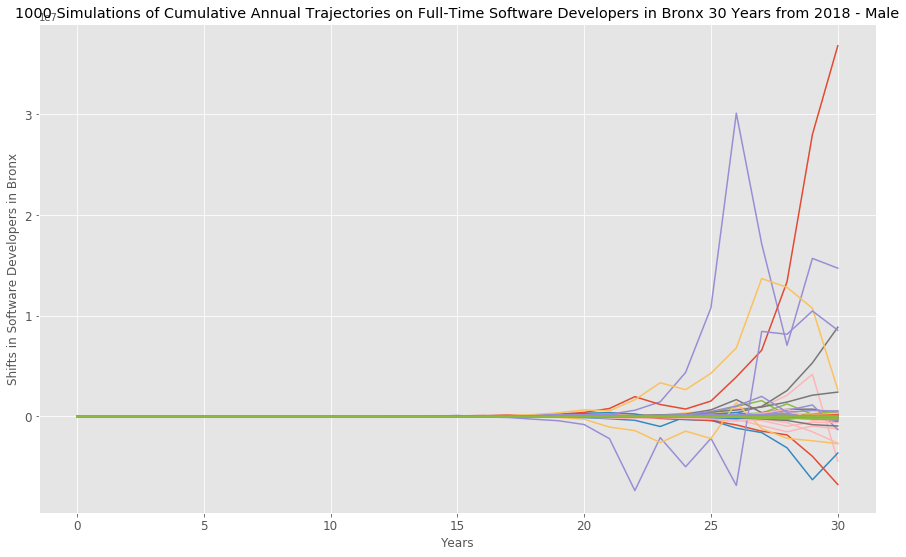

In [77]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_bronx = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Bronx 30 Years from 2018 - Male"
software_cumulative_moves_bronx.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Bronx')
plt.show()

<Figure size 432x288 with 0 Axes>

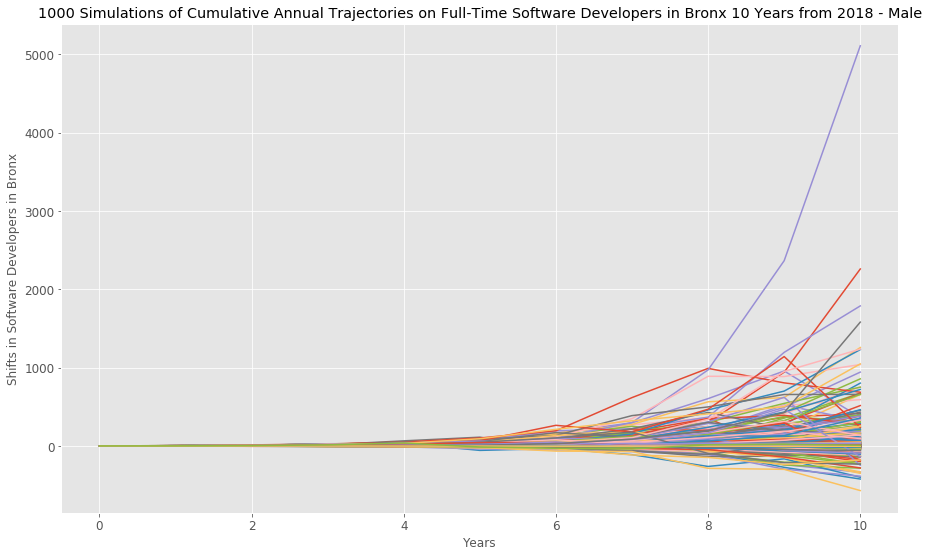

In [78]:
# Trajectory for the next 10 years
monte_carlo_cum_moves_software_bronx_decade = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Bronx 10 Years from 2018 - Male"
software_cumulative_moves_bronx.iloc[0:11, :].plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Bronx')
plt.show()

In [79]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_software_cumulative_moves_bronx = software_cumulative_moves_bronx.iloc[-1, :]
ending_software_cumulative_moves_bronx.head()

0        0.013964
1   -79484.022326
2     -855.672769
3        0.073710
4     -169.801356
Name: 30, dtype: float64

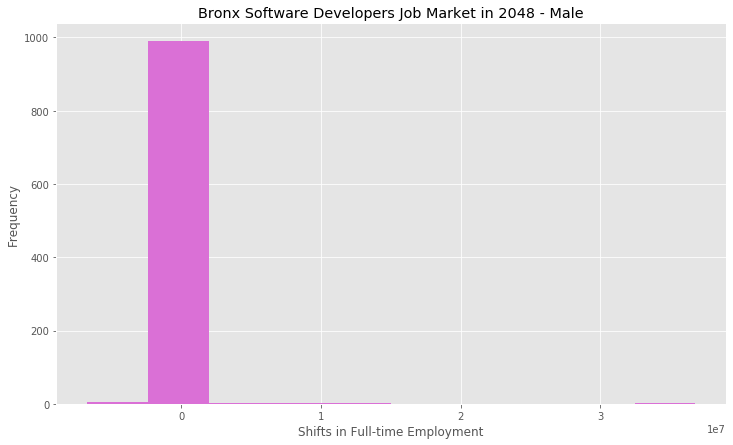

In [80]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_software_bronx = plt.figure()
ending_software_cumulative_moves_bronx.plot(kind='hist', bins=10, color = 'orchid', 
                             title='Bronx Software Developers Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [81]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_software_bronx = ending_software_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
confidence_interval_software_bronx

0.025   -91570.765835
0.975    97395.036574
Name: 30, dtype: float64

In [82]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_software_cumulative_moves_bronx.value_counts(bins=10) / len(ending_software_cumulative_moves_bronx)

(-2400136.483, 1956189.829]            0.989
(-6800026.0600000005, -2400136.483]    0.005
(6312516.141, 10668842.453]            0.002
(1956189.829, 6312516.141]             0.002
(32450474.014, 36806800.326]           0.001
(10668842.453, 15025168.765]           0.001
(28094147.702, 32450474.014]           0.000
(23737821.39, 28094147.702]            0.000
(19381495.077, 23737821.39]            0.000
(15025168.765, 19381495.077]           0.000
Name: 30, dtype: float64

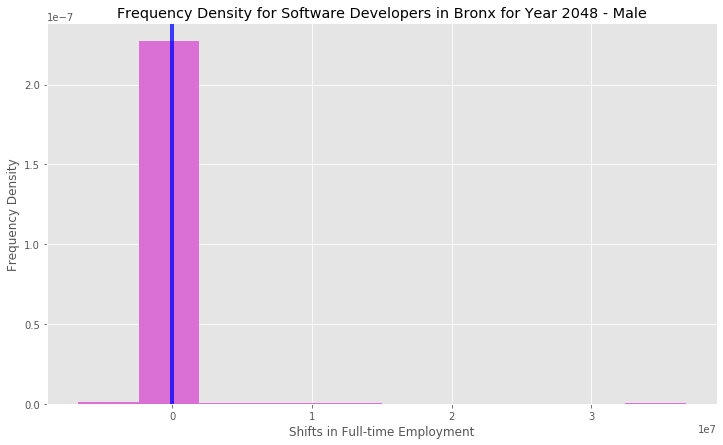

In [83]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_software_bronx = plt.figure()
ending_software_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Software Developers in Bronx for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_software_bronx.iloc[0], color='blue')
plt.axvline(confidence_interval_software_bronx.iloc[1], color='blue')
plt.show()

In [84]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_software_cumulative_moves_bronx = software_cumulative_moves_bronx.iloc[-20, :]
tenth_software_cumulative_moves_bronx.head()

0     0.059578
1    -7.135528
2    33.130648
3    -0.180358
4     0.372688
Name: 11, dtype: float64

In [85]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_software_confidence_interval_bronx = tenth_software_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
tenth_software_confidence_interval_bronx

0.025   -186.370847
0.975    696.135892
Name: 11, dtype: float64

In [86]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_software_cumulative_moves_bronx.value_counts(bins=10) / len(tenth_software_cumulative_moves_bronx)

(-112.072, 415.952]      0.919
(-640.097, -112.072]     0.033
(415.952, 943.977]       0.026
(943.977, 1472.001]      0.008
(2000.026, 2528.05]      0.005
(-1173.403, -640.097]    0.004
(1472.001, 2000.026]     0.003
(3584.099, 4112.124]     0.001
(3056.075, 3584.099]     0.001
(2528.05, 3056.075]      0.000
Name: 11, dtype: float64

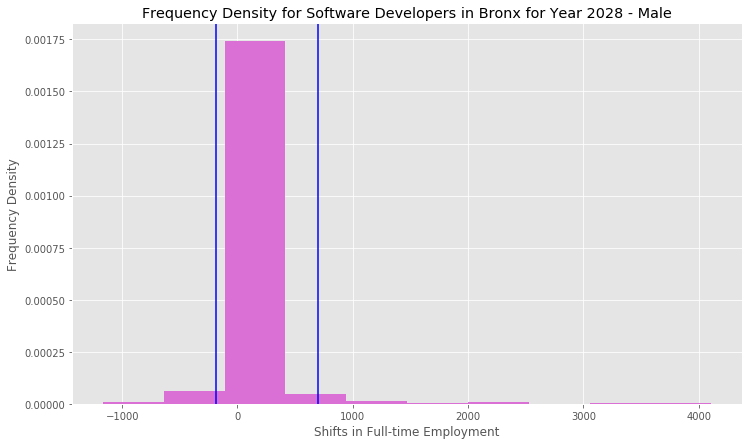

In [87]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_software_cum_moves_bronx = plt.figure()
tenth_software_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Software Developers in Bronx for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_software_confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(tenth_software_confidence_interval_bronx.iloc[1], color='blue')
plt.show()

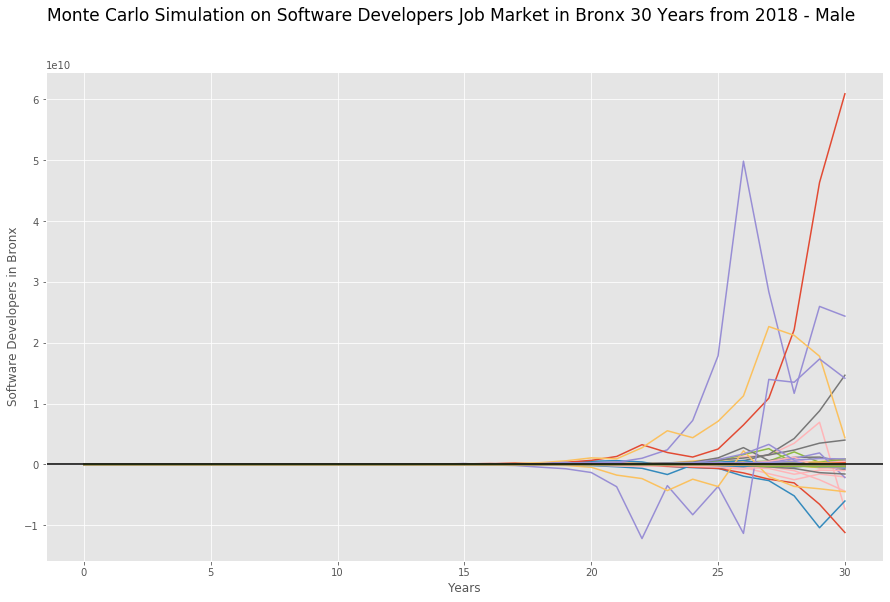

In [98]:
# Set initial employment
initial_software_bronx = software_devops_male_last_bronx 

fig_software_bronx = plt.figure(figsize=(15,9))
fig_software_bronx.suptitle('Monte Carlo Simulation on Software Developers Job Market in Bronx 30 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_bronx * initial_software_bronx)
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

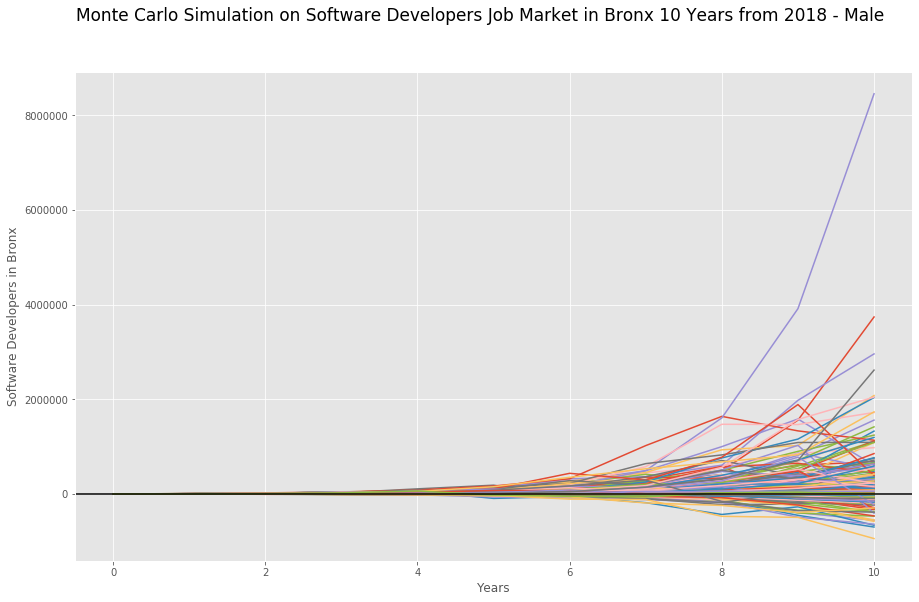

In [99]:
# Zoon in 10-year trajectories
fig_software_bronx = plt.figure(figsize=(15,9))
fig_software_bronx.suptitle('Monte Carlo Simulation on Software Developers Job Market in Bronx 10 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_bronx.iloc[0:11, :] * initial_software_bronx)
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

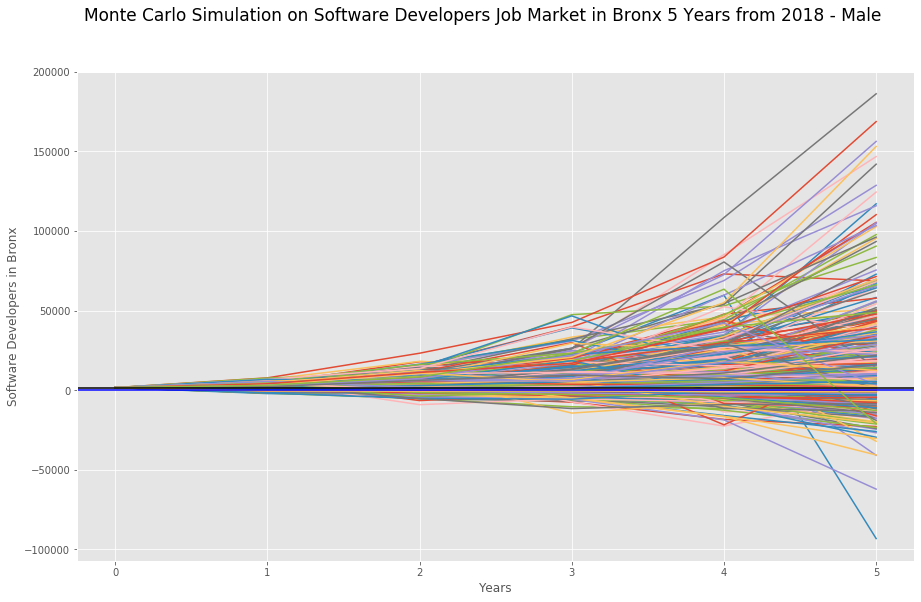

In [100]:
# Zoon in 5-year trajectories due to high volatilities
fig_software_bronx = plt.figure(figsize=(15,9))
fig_software_bronx.suptitle('Monte Carlo Simulation on Software Developers Job Market in Bronx 5 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_bronx.iloc[0:6, :] * initial_software_bronx)
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

In [101]:
# Calculate employment gains/drops of lower and upper bound cumulative county moves
software_gnl_lower_bound_bronx = initial_software_bronx * confidence_interval_software_bronx.iloc[0]
software_gnl_upper_bound_bronx = initial_software_bronx * confidence_interval_software_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_bronx:,.0f} in male software developers"
      f" over the next 30 years will end within in the range of"
      f" {software_gnl_lower_bound_bronx:,.0f} and {software_gnl_upper_bound_bronx:,.0f}.")

There is a 95% chance that an initial employment of 1,655 in male software developers over the next 30 years will end within in the range of -151,549,617 and 161,188,786.


In [102]:
# Confidence interval in a decade
tenth_software_gnl_lower_bound_bronx = initial_software_bronx * tenth_software_confidence_interval_bronx.iloc[0]
tenth_software_gnl_upper_bound_bronx = initial_software_bronx * tenth_software_confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_bronx:,.0f} on male software developers"
      f" will end within in the range of"
      f" {tenth_software_gnl_lower_bound_bronx:,.0f} and {tenth_software_gnl_upper_bound_bronx:,.0f} over the next 10 years .")

There is a 95% chance that an initial employment of 1,655 on male software developers will end within in the range of -308,444 and 1,152,105 over the next 10 years .


In [103]:
software_trajectories_bronx = initial_software_bronx * software_cumulative_moves_bronx.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
software_trajectories_bronx.columns = ['Lower 5%', 'Median', 'Upper 5%']
software_trajectories_bronx

Lower 5%       Median      Upper 5%
0   1.655000e+03  1655.000000  1.655000e+03
1  -5.206278e+02  2387.299505  5.042955e+03
2  -1.268459e+03  2649.143713  1.059073e+04
3  -2.299676e+03  2752.160919  1.791264e+04
4  -5.079603e+03  2582.121281  3.144421e+04
5  -9.625239e+03  2108.717952  5.047683e+04
6  -1.443702e+04  1575.857919  8.670206e+04
7  -2.181971e+04  1020.864706  1.335739e+05
8  -3.169682e+04   854.314616  2.475755e+05
9  -4.736384e+04   535.170572  2.872437e+05
10 -8.377812e+04   235.845988  3.910852e+05
11 -1.305244e+05   214.417178  5.816502e+05
12 -1.567201e+05   203.249742  7.195738e+05
13 -2.144937e+05   128.755706  1.016757e+06
14 -2.716043e+05    86.217632  1.371077e+06
15 -5.040280e+05    58.739537  2.202836e+06
16 -7.436914e+05    44.406008  2.444049e+06
17 -9.686155e+05    41.561356  2.904744e+06
18 -1.287396e+06    56.309656  3.652269e+06
19 -1.378539e+06    43.373028  4.082934e+06
20 -1.794009e+06    11.475749  4.966350e+06
21 -2.724475e+06     3.294307  5.756825e+06
22 -3.786179e+06     1.153991  5.269866e+06
23 -5.283539e+06    -0.039757  6.220690e+06
24 -6.148000e+06    -0.624150  9.674413e+06
25 -9.947004e+06     0.257441  1.401276e+07
26 -1.355770e+07     0.140331  1.944076e+07
27 -1.244236e+07     0.388816  2.102622e+07
28 -1.638397e+07    -0.006814  2.628659e+07
29 -1.893988e+07     0.371580  3.727855e+07
30 -3.479409e+07    -0.012268  3.749044e+07

<Figure size 432x288 with 0 Axes>

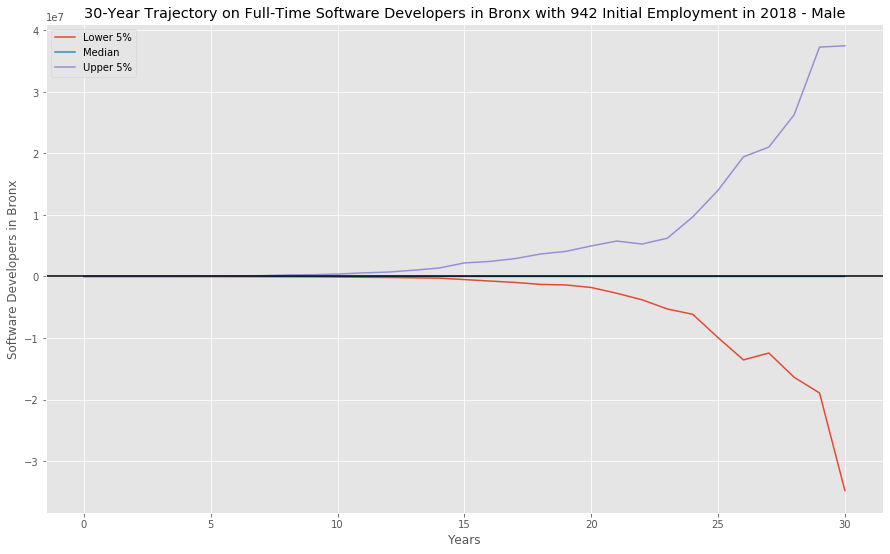

In [106]:
ax_cum_software_bronx = plt.figure()
software_trajectories_bronx.plot(title="30-Year Trajectory on Full-Time Software Developers in Bronx with 942 Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
#plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

<Figure size 432x288 with 0 Axes>

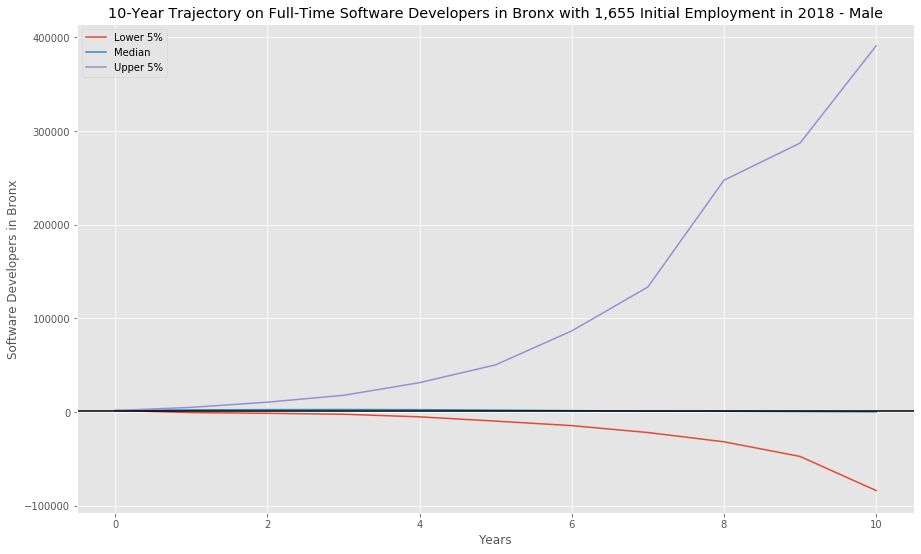

In [108]:
ax_cum_software_bronx_decade = plt.figure()
software_trajectories_bronx.iloc[0:11, :].plot(title="10-Year Trajectory on Full-Time Software Developers in Bronx with 1,655 Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

<Figure size 432x288 with 0 Axes>

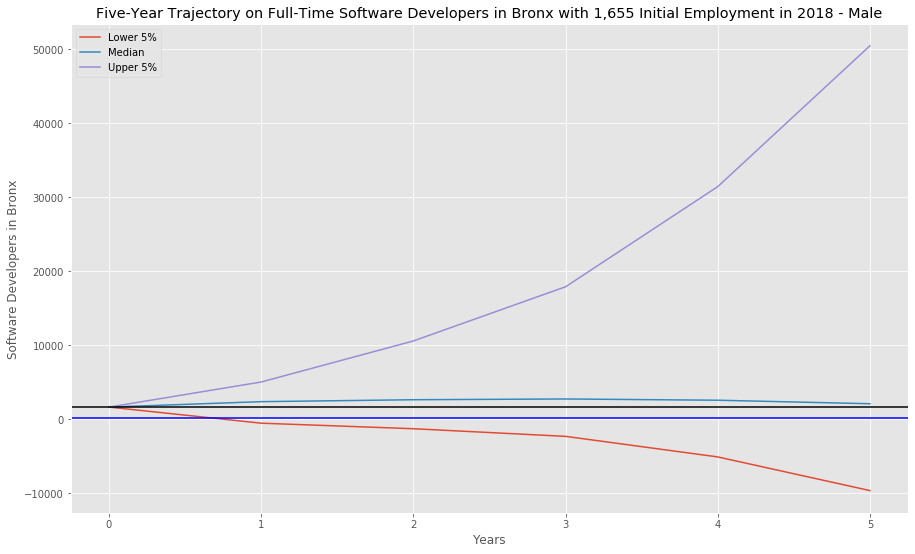

In [113]:
ax_cum_software_bronx_five = plt.figure()
software_trajectories_bronx.iloc[0:6, :].plot(title="Five-Year Trajectory on Full-Time Software Developers in Bronx with 1,655 Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = software_devops_male_last_bronx, color = 'black', linestyle = '-')
plt.axhline(y = software_devops_female_last_bronx, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Bronx')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Brooklyn Over 30 Years Starting from 2018

In [114]:
software_df_brooklyn = software_devops_Brooklyn
software_df_brooklyn

Software_devops_male  \
County Year Name                                           
047    2010 Kings County, New York                9372.0   
       2011 Kings County, New York                9963.0   
       2012 Kings County, New York                9372.0   
       2013 Kings County, New York                9112.0   
       2014 Kings County, New York               10016.0   
       2015 Kings County, New York               10376.0   
       2016 Kings County, New York               12250.0   
       2017 Kings County, New York               12181.0   
       2018 Kings County, New York               13841.0   

                                    Software_devops_female  
County Year Name                                            
047    2010 Kings County, New York                  2111.0  
       2011 Kings County, New York                  2526.0  
       2012 Kings County, New York                  2676.0  
       2013 Kings County, New York                  2744.0  
       2014 Kings County, New York                  2549.0  
       2015 Kings County, New York                  3114.0  
       2016 Kings County, New York                  2856.0  
       2017 Kings County, New York                  3866.0  
       2018 Kings County, New York                  3085.0

In [115]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_software_brooklyn = software_df_brooklyn.pct_change().fillna(0)
annual_moves_software_brooklyn

Software_devops_male  \
County Year Name                                           
047    2010 Kings County, New York              0.000000   
       2011 Kings County, New York              0.063060   
       2012 Kings County, New York             -0.059319   
       2013 Kings County, New York             -0.027742   
       2014 Kings County, New York              0.099210   
       2015 Kings County, New York              0.035942   
       2016 Kings County, New York              0.180609   
       2017 Kings County, New York             -0.005633   
       2018 Kings County, New York              0.136278   

                                    Software_devops_female  
County Year Name                                            
047    2010 Kings County, New York                0.000000  
       2011 Kings County, New York                0.196589  
       2012 Kings County, New York                0.059382  
       2013 Kings County, New York                0.025411  
       2014 Kings County, New York               -0.071064  
       2015 Kings County, New York                0.221656  
       2016 Kings County, New York               -0.082852  
       2017 Kings County, New York                0.353641  
       2018 Kings County, New York               -0.202018

In [116]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_software_devops_male_brooklyn = annual_moves_software_brooklyn.mean()['Software_devops_male']
avg_annual_moves_software_devops_female_brooklyn = annual_moves_software_brooklyn.mean()['Software_devops_female']
avg_annual_moves_software_devops_male_brooklyn

0.04693389623259123

In [117]:
avg_annual_moves_software_devops_female_brooklyn

0.055638491010529104

In [118]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_software_devops_male_brooklyn = annual_moves_software_brooklyn.std()['Software_devops_male']
std_dev_annual_moves_software_devops_female_brooklyn = annual_moves_software_brooklyn.std()['Software_devops_female']
std_dev_annual_moves_software_devops_male_brooklyn

0.07968482451736368

In [119]:
std_dev_annual_moves_software_devops_female_brooklyn

0.17388129752725162

In [121]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
software_devops_male_last_brooklyn  = software_df_brooklyn['Software_devops_male'][-1]
software_devops_female_last_brooklyn = software_df_brooklyn['Software_devops_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_software_df_brooklyn = pd.DataFrame()
software_cumulative_moves_brooklyn = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_software_devop_male_brooklyn = []
    simulated_software_devop_female_brooklyn = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_software_devops_male_brooklyn = [software_devops_male_last_brooklyn]
    simulated_software_devops_female_brooklyn = [software_devops_female_last_brooklyn]
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_software_devop_male_brooklyn = simulated_software_devops_male_brooklyn[count] * (1 + np.random.normal(avg_annual_moves_software_devops_male_brooklyn, std_dev_annual_moves_software_devops_male_brooklyn))
        simulated_software_devop_female_brooklyn = simulated_software_devops_female_brooklyn[count] * (1 + np.random.normal(avg_annual_moves_software_devops_female_brooklyn, std_dev_annual_moves_software_devops_female_brooklyn))

        simulated_software_devops_male_brooklyn.append(simulated_software_devop_male_brooklyn)
        simulated_software_devops_female_brooklyn.append(simulated_software_devop_female_brooklyn)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_software_df_brooklyn['Software_devops_male'] = simulated_software_devops_male_brooklyn
    simulated_software_df_brooklyn['Software_devops_female'] = simulated_software_devops_female_brooklyn
    
    # Calculate the daily returns of simulated prices
    simulated_software_moves_brooklyn = simulated_software_df_brooklyn.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    software_annual_moves_brooklyn = simulated_software_moves_brooklyn.dot(weights)
    
    # Calculate the normalized, cumulative return series
    software_cumulative_moves_brooklyn[n] = (1 + software_annual_moves_brooklyn.fillna(0)).cumprod()

# Print records from the DataFrame
software_cumulative_moves_brooklyn

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.087033  1.053050  1.111497  1.010760  1.153791  1.152909  1.110706   
2   1.112749  1.125830  1.246494  0.979564  1.069223  1.128871  1.227584   
3   1.072571  1.289909  1.126239  0.953086  1.097938  1.234202  1.192481   
4   1.047604  1.386029  1.074917  0.944456  1.238778  1.248879  1.245364   
5   1.174244  1.464236  1.055431  0.896595  1.341528  1.408055  1.337973   
6   1.020216  1.496996  1.118042  0.921803  1.425075  1.456262  1.423884   
7   1.058327  1.637374  1.054856  0.930995  1.655012  1.352837  1.553862   
8   0.972200  1.805578  1.093096  0.966195  1.642806  1.425156  1.441393   
9   0.958750  2.021882  1.126778  0.961481  1.550000  1.498743  1.558563   
10  1.105847  2.289536  1.235301  1.065268  1.688072  1.679460  1.651329   
11  1.239012  2.000602  1.379692  1.101009  1.770817  1.894189  1.866349   
12  1.318883  2.305896  1.288796  1.062409  1.586464  2.124109  1.837253   
13  1.428307  2.771459  1.382354  1.122885  1.751108  2.170980  1.938138   
14  1.479421  3.181168  1.343646  1.227843  1.586874  2.491369  1.994345   
15  1.517273  3.312108  1.288125  1.117934  1.708307  2.794061  1.949899   
16  1.700367  3.174686  1.215247  1.337761  1.692611  2.960854  2.109105   
17  1.979266  3.355964  1.121354  1.579884  1.661032  2.689968  2.291741   
18  2.044081  3.502144  1.161207  1.672339  2.067872  2.989026  2.501966   
19  2.114544  3.922082  1.149948  1.511039  2.292685  3.080252  2.564244   
20  2.444885  4.515324  1.193284  1.372869  2.374366  3.645109  2.284224   
21  2.461995  4.817127  1.453025  1.333940  1.969317  4.012124  2.353561   
22  2.028662  5.238271  1.653118  1.523933  1.717456  4.575789  2.697377   
23  2.051788  5.784560  1.835509  1.523706  1.980826  5.273017  2.858881   
24  2.154023  5.861649  1.819822  1.691741  2.136020  5.584512  3.091395   
25  2.625719  5.611026  1.625469  1.876732  1.994660  6.042857  3.389149   
26  2.756843  5.146132  1.502095  1.812007  2.079736  6.771362  3.442208   
27  3.074974  5.444133  1.629753  2.236153  2.106906  8.107025  3.657782   
28  3.521212  5.721094  1.408697  2.373658  2.137747  9.410290  3.349461   
29  3.855065  5.586847  1.493014  2.388563  2.322899  9.370789  3.615317   
30  4.095725  6.461731  1.549790  2.479692  2.182569  9.399520  3.690345   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.925019  1.011724  1.100189  ...  1.101872  0.959592  1.031511  1.141238   
2   1.057589  1.057233  0.974089  ...  1.015891  0.884525  1.153090  1.009738   
3   1.146719  1.173136  0.856285  ...  1.112199  0.925260  1.303398  1.050828   
4   1.217846  1.180890  0.913455  ...  1.018858  0.892984  1.431445  1.187174   
5   1.291205  1.113988  1.000565  ...  1.068315  0.968038  1.386840  1.242583   
6   1.365983  1.048391  1.186410  ...  1.224222  1.132312  1.442839  1.390621   
7   1.323006  1.125085  1.236505  ...  1.349898  1.268000  1.395339  1.550154   
8   1.398628  1.063490  1.218495  ...  1.450304  1.371615  1.279318  1.612036   
9   1.366356  1.213843  1.315599  ...  1.556176  1.389790  1.143229  1.695450   
10  1.519806  1.134418  1.325120  ...  1.487278  1.457198  1.200363  1.804439   
11  1.580342  1.305730  1.358430  ...  1.682423  1.435548  1.201197  2.238493   
12  1.694605  1.485705  1.600137  ...  1.695718  1.442115  1.267945  1.851675   
13  2.007766  1.599720  1.730073  ...  1.822019  1.383598  1.209461  2.052493   
14  2.071486  1.662645  1.723690  ...  1.904711  1.304008  1.328726  2.200352   
15  1.853071  1.608222  1.887692  ...  1.995641  1.248275  1.511401  2.055555   
16  1.989966  1.613591  1.789022  ...  2.253779  1.398821  1.478958  2.005852   
17  2.155216  1.573243  1.731152  ...  2.652302  1.247038  1.464374  2.119374   
18  2.522666  1.737053  1.836766  ...

<Figure size 432x288 with 0 Axes>

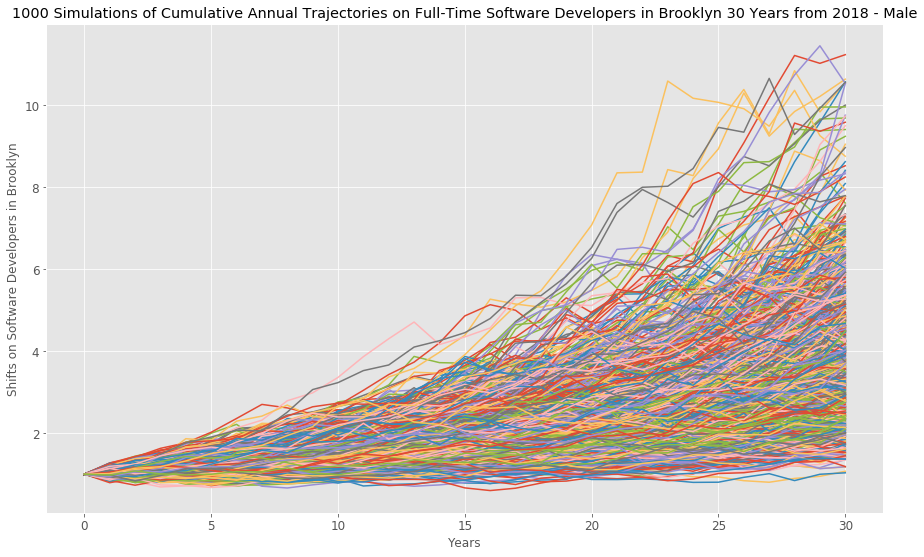

In [122]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_brooklyn = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Brooklyn 30 Years from 2018 - Male"
software_cumulative_moves_brooklyn.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts on Software Developers in Brooklyn')
plt.show()

<Figure size 432x288 with 0 Axes>

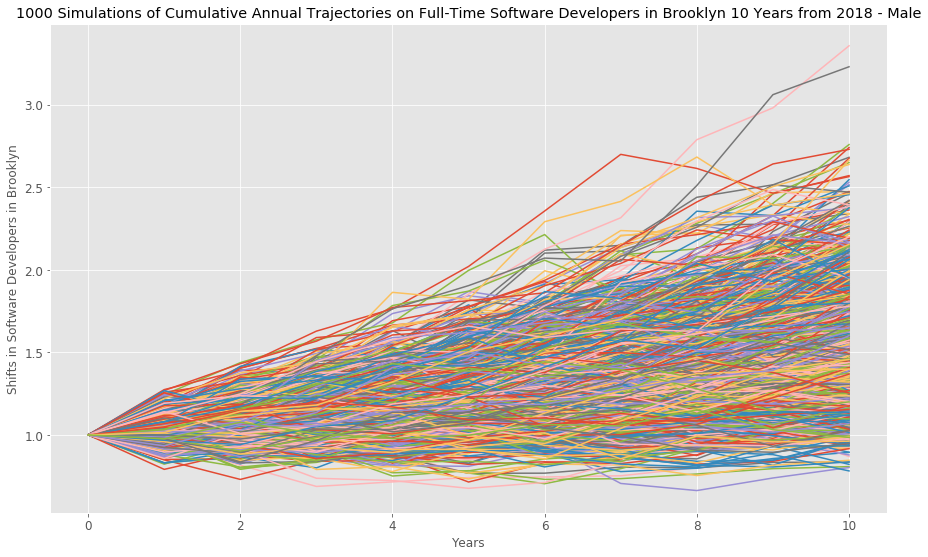

In [123]:
# Trajectory for the next 10 years
monte_carlo_cum_moves_software_brooklyn_decade = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Brooklyn 10 Years from 2018 - Male"
software_cumulative_moves_brooklyn.iloc[0:11, :].plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Brooklyn')
plt.show()

In [124]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_software_cumulative_moves_brooklyn = software_cumulative_moves_brooklyn.iloc[-1, :]
ending_software_cumulative_moves_brooklyn.head()

0    4.095725
1    6.461731
2    1.549790
3    2.479692
4    2.182569
Name: 30, dtype: float64

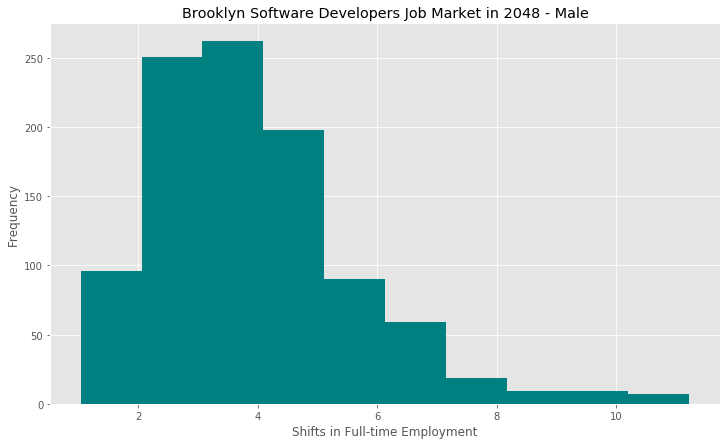

In [125]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_software_brooklyn = plt.figure()
ending_software_cumulative_moves_brooklyn.plot(kind='hist', bins=10, color = 'Teal', 
                             title='Brooklyn Software Developers Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [126]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_software_brooklyn = ending_software_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
confidence_interval_software_brooklyn

0.025    1.509656
0.975    8.086491
Name: 30, dtype: float64

In [127]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
ending_software_cumulative_moves_brooklyn.value_counts(bins=10) / len(ending_software_cumulative_moves_brooklyn)

(3.071, 4.09]                  0.262
(2.052, 3.071]                 0.251
(4.09, 5.109]                  0.198
(1.0210000000000001, 2.052]    0.096
(5.109, 6.128]                 0.090
(6.128, 7.147]                 0.059
(7.147, 8.166]                 0.019
(9.186, 10.205]                0.009
(8.166, 9.186]                 0.009
(10.205, 11.224]               0.007
Name: 30, dtype: float64

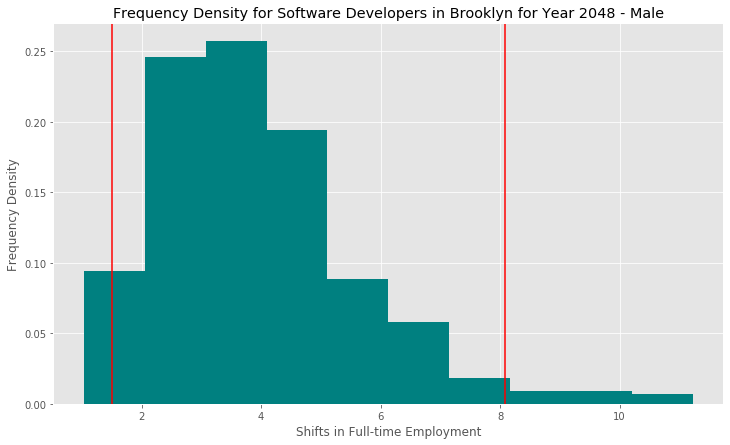

In [128]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves_software_brooklyn = plt.figure()
ending_software_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Software Developers in Brooklyn for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_software_brooklyn.iloc[0], color='red')
plt.axvline(confidence_interval_software_brooklyn.iloc[1], color='red')
plt.show()

In [129]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_software_cumulative_moves_brooklyn = software_cumulative_moves_brooklyn.iloc[-20, :]
tenth_software_cumulative_moves_brooklyn.head()

0    1.239012
1    2.000602
2    1.379692
3    1.101009
4    1.770817
Name: 11, dtype: float64

In [130]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_software_confidence_interval_brooklyn = tenth_software_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
tenth_software_confidence_interval_brooklyn

0.025    0.974021
0.975    2.570284
Name: 11, dtype: float64

In [131]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
tenth_software_cumulative_moves_brooklyn.value_counts(bins=10) / len(tenth_software_cumulative_moves_brooklyn)

(1.342, 1.657]    0.305
(1.657, 1.972]    0.251
(1.027, 1.342]    0.210
(1.972, 2.287]    0.124
(2.287, 2.602]    0.050
(0.708, 1.027]    0.040
(2.602, 2.918]    0.016
(2.918, 3.233]    0.002
(3.548, 3.863]    0.001
(3.233, 3.548]    0.001
Name: 11, dtype: float64

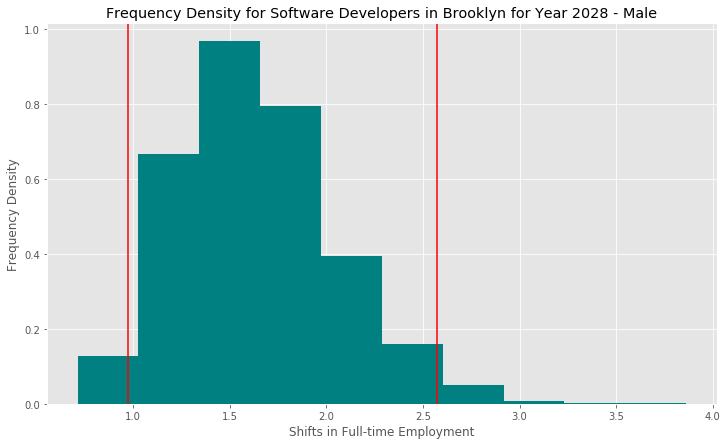

In [132]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_software_cum_moves_brooklyn = plt.figure()
tenth_software_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Software Developers in Brooklyn for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_software_confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(tenth_software_confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

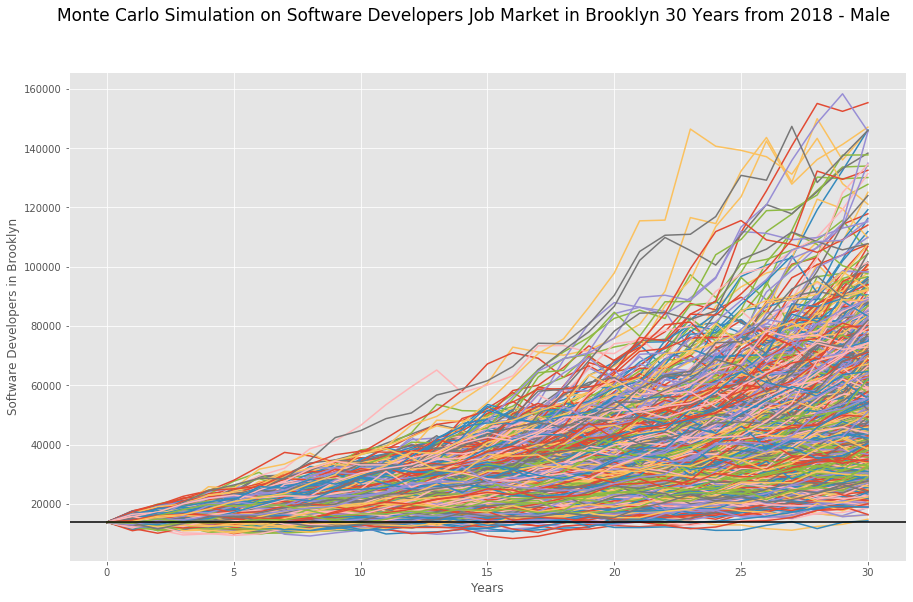

In [133]:
# Set initial employment
initial_software_brooklyn = software_devops_male_last_brooklyn 

# Plot scaled monte-carlo simulation for Brooklyn job market
fig_software_brooklyn = plt.figure(figsize=(15,9))
fig_software_brooklyn.suptitle('Monte Carlo Simulation on Software Developers Job Market in Brooklyn 30 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_brooklyn * initial_software_brooklyn)
plt.axhline(y = software_devops_male_last_brooklyn, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_brooklyn, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Brooklyn')
plt.show()

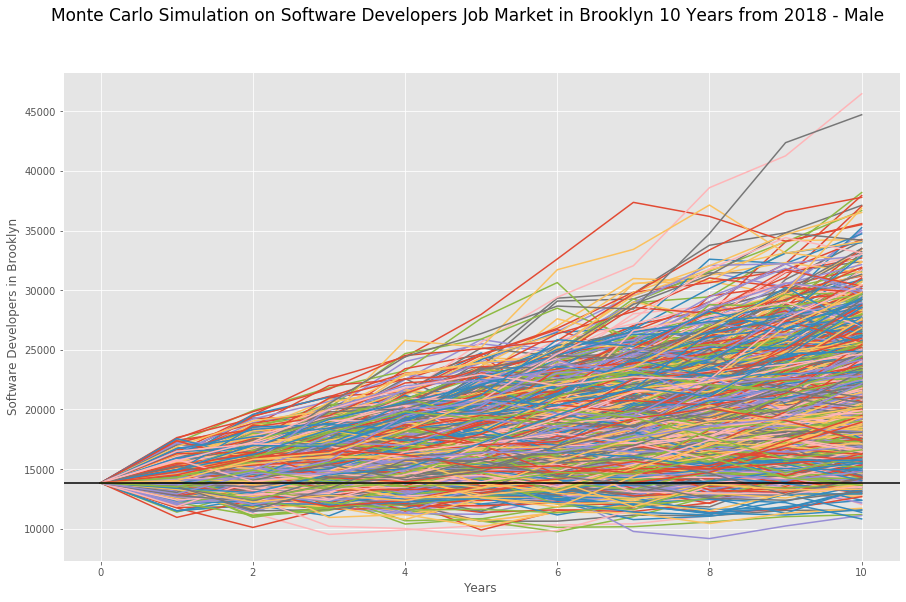

In [134]:
# Zoon in 10-year trajectories
fig_software_brooklyn = plt.figure(figsize=(15,9))
fig_software_brooklyn.suptitle('Monte Carlo Simulation on Software Developers Job Market in Brooklyn 10 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_brooklyn.iloc[0:11, :] * initial_software_brooklyn)
plt.axhline(y = software_devops_male_last_brooklyn, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_brooklyn, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Brooklyn')
plt.show()

In [138]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
software_gnl_lower_bound_brooklyn = initial_software_brooklyn * confidence_interval_software_brooklyn.iloc[0]
software_gnl_upper_bound_brooklyn = initial_software_brooklyn * confidence_interval_software_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_brooklyn:,.0f} for male software developers"
      f" in Brooklyn over the next 30 years will end within in the range of"
      f" {software_gnl_lower_bound_brooklyn:,.0f} and {software_gnl_upper_bound_brooklyn:,.0f}.")

There is a 95% chance that an initial employment of 13,841 for male software developers in Brooklyn over the next 30 years will end within in the range of 20,895 and 111,925.


In [136]:
tenth_software_gnl_lower_bound_brooklyn = initial_software_brooklyn * tenth_software_confidence_interval_brooklyn.iloc[0]
tenth_software_gnl_upper_bound_brooklyn = initial_software_brooklyn * tenth_software_confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_brooklyn:,.0f} on male software developers"
      f" in Brooklyn will end within in the range of"
      f" {tenth_software_gnl_lower_bound_brooklyn:,.0f} and {tenth_software_gnl_upper_bound_brooklyn:,.0f} over the next 10 years .")

There is a 95% chance that an initial employment of 13,841 on male software developers in Brooklyn will end within in the range of 13,481 and 35,575 over the next 10 years .


In [139]:
software_trajectories_brooklyn = initial_software_brooklyn * software_cumulative_moves_brooklyn.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
software_trajectories_brooklyn.columns = ['Lower 5%', 'Median', 'Upper 5%']
software_trajectories_brooklyn

Lower 5%        Median      Upper 5%
0   13841.000000  13841.000000  13841.000000
1   12697.253206  14481.712614  16148.134948
2   12523.057065  15115.129515  17642.431904
3   12697.372054  15786.397861  19178.164554
4   12862.973063  16375.524672  20781.841511
5   13195.670928  17076.694850  22535.651720
6   13069.512198  17777.510003  24158.081395
7   13060.487657  18605.769664  25709.647879
8   13560.471722  19450.559773  27238.428222
9   13940.276332  20328.801462  29359.746170
10  14174.451755  21233.245788  30868.918031
11  14570.296369  22164.761502  32682.201042
12  14817.895630  23204.357836  34846.704135
13  15116.615680  24214.239443  37710.552374
14  15797.916980  25066.820107  40428.431616
15  15777.785672  26337.929395  42028.770102
16  16023.591022  27312.029119  45196.293887
17  16804.391716  28304.664987  48363.577921
18  16955.490395  29647.716022  50911.221105
19  17777.117862  30860.096948  53675.863498
20  18124.989986  31974.334483  57107.107845
21  19074.441155  33433.304989  59754.999627
22  18601.542993  34943.507925  63708.402445
23  19307.843076  36077.160381  65303.577077
24  20158.194831  37978.051728  69942.945508
25  20948.702141  38987.873378  74736.751739
26  21117.252225  41065.035891  77201.962696
27  21986.893624  43215.107599  82067.247392
28  22594.348110  45634.513587  86822.058890
29  23289.624766  47926.092916  90840.294399
30  24006.623997  50367.364969  96447.427727

<Figure size 432x288 with 0 Axes>

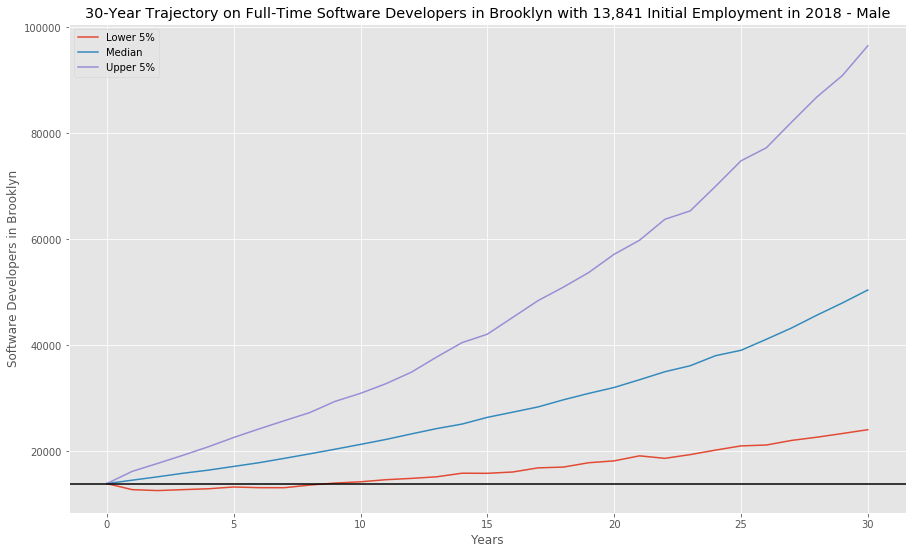

In [140]:
ax_cum_software_brooklyn = plt.figure()
software_trajectories_brooklyn.plot(title="30-Year Trajectory on Full-Time Software Developers in Brooklyn with 13,841 Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = software_devops_male_last_brooklyn, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_brooklyn, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Brooklyn')
plt.show()

### Monte Carlo Simulation on Full-Time Computer Developers in Queens Over 30 Years Starting from 2018

In [141]:
software_df_queens = software_devops_Queens
software_df_queens

Software_devops_male  \
County Year Name                                            
081    2010 Queens County, New York                4185.0   
       2011 Queens County, New York                6753.0   
       2012 Queens County, New York                6748.0   
       2013 Queens County, New York                6815.0   
       2014 Queens County, New York                6937.0   
       2015 Queens County, New York                6142.0   
       2016 Queens County, New York                7991.0   
       2017 Queens County, New York                9778.0   
       2018 Queens County, New York                6919.0   

                                     Software_devops_female  
County Year Name                                             
081    2010 Queens County, New York                  1310.0  
       2011 Queens County, New York                  2046.0  
       2012 Queens County, New York                  1310.0  
       2013 Queens County, New York                  2436.0  
       2014 Queens County, New York                  1709.0  
       2015 Queens County, New York                  2016.0  
       2016 Queens County, New York                  2150.0  
       2017 Queens County, New York                  1731.0  
       2018 Queens County, New York                  1021.0

In [142]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_software_queens = software_df_queens.pct_change().fillna(0)
annual_moves_software_queens

Software_devops_male  \
County Year Name                                            
081    2010 Queens County, New York              0.000000   
       2011 Queens County, New York              0.613620   
       2012 Queens County, New York             -0.000740   
       2013 Queens County, New York              0.009929   
       2014 Queens County, New York              0.017902   
       2015 Queens County, New York             -0.114603   
       2016 Queens County, New York              0.301042   
       2017 Queens County, New York              0.223627   
       2018 Queens County, New York             -0.292391   

                                     Software_devops_female  
County Year Name                                             
081    2010 Queens County, New York                0.000000  
       2011 Queens County, New York                0.561832  
       2012 Queens County, New York               -0.359726  
       2013 Queens County, New York                0.859542  
       2014 Queens County, New York               -0.298440  
       2015 Queens County, New York                0.179637  
       2016 Queens County, New York                0.066468  
       2017 Queens County, New York               -0.194884  
       2018 Queens County, New York               -0.410168

In [143]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_software_devops_male_queens = annual_moves_software_queens.mean()['Software_devops_male']
avg_annual_moves_software_devops_female_queens = annual_moves_software_queens.mean()['Software_devops_female']
avg_annual_moves_software_devops_male_queens

0.08426498497395268

In [144]:
avg_annual_moves_software_devops_female_queens

0.04491798883062321

In [145]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_software_devops_male_queens = annual_moves_software_queens.std()['Software_devops_male']
std_dev_annual_moves_software_devops_female_queens = annual_moves_software_queens.std()['Software_devops_female']
std_dev_annual_moves_software_devops_male_queens

0.2627511654971969

In [146]:
std_dev_annual_moves_software_devops_female_queens

0.4326781663147727

In [147]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
software_devops_male_last_queens  = software_df_queens['Software_devops_male'][-1]
software_devops_female_last_queens = software_df_queens['Software_devops_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_software_df_queens = pd.DataFrame()
software_cumulative_moves_queens = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_software_devop_male_queens = []
    simulated_software_devop_female_queens = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_software_devops_male_queens = [software_devops_male_last_queens]
    simulated_software_devops_female_queens = [software_devops_female_last_queens]
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_software_devop_male_queens = simulated_software_devops_male_queens[count] * (1 + np.random.normal(avg_annual_moves_software_devops_male_queens, std_dev_annual_moves_software_devops_male_queens))
        simulated_software_devop_female_queens = simulated_software_devops_female_queens[count] * (1 + np.random.normal(avg_annual_moves_software_devops_female_queens, std_dev_annual_moves_software_devops_female_queens))

        simulated_software_devops_male_queens.append(simulated_software_devop_male_queens)
        simulated_software_devops_female_queens.append(simulated_software_devop_female_queens)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_software_df_queens['Software_devops_male'] = simulated_software_devops_male_queens
    simulated_software_df_queens['Software_devops_female'] = simulated_software_devops_female_queens
    
    # Calculate the daily returns of simulated prices
    simulated_software_moves_queens = simulated_software_df_queens.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    software_annual_moves_queens = simulated_software_moves_queens.dot(weights)
    
    # Calculate the normalized, cumulative return series
    software_cumulative_moves_queens[n] = (1 + software_annual_moves_queens.fillna(0)).cumprod()

# Print records from the DataFrame
software_cumulative_moves_queens

0          1         2         3         4         5         6    \
0   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.144754   1.532473  0.575254  0.855472  1.069561  1.128425  1.220501   
2   1.581509   2.351680  0.559528  0.322723  0.844043  0.681544  1.995110   
3   1.557847   2.566012  0.203772  0.248675  0.679006  0.867361  1.772208   
4   1.444961   2.501142  0.182762  0.275072  0.636715  0.982861  1.297636   
5   0.970845   2.898088  0.160391  0.295412  0.444419  0.636099  1.188032   
6   1.148948   3.750512  0.185360  0.196367  0.507552  0.922879  1.328048   
7   1.442533   3.997106  0.253729  0.229163  0.299074  1.061752  1.284869   
8   1.447332   5.333263  0.173567  0.343394  0.362741  0.748559  0.935573   
9   1.486748   4.524532  0.256927  0.426559  0.447609  0.660835  0.878590   
10  1.830371   4.954666  0.274101  0.444203  0.574040  0.521901  1.197946   
11  1.564988   3.700400  0.265791  0.474155  0.546913  0.498560  0.779578   
12  0.959367   3.271306  0.374038  0.303797  0.762252  0.434743  0.724900   
13  0.869984   3.304150  0.352526  0.300066  0.823806  0.364813  0.580439   
14  0.839260   4.022694  0.430011  0.230905  0.851008  0.238719  0.534402   
15  0.930769   5.735381  0.438156  0.280055  1.093836  0.217683  0.653257   
16  1.117640   1.509554  0.128716  0.361437  1.232291  0.240654  0.686044   
17  1.368447   2.173819  0.152200  0.269138  1.820145  0.180152  0.339908   
18  1.361770   1.401144  0.160427  0.217224  1.653421  0.208456  0.322206   
19  2.129748   1.743485  0.204827  0.254297  1.238956  0.233157  0.145869   
20  2.818390   2.268927  0.236712  0.166200  1.439412  0.322297  0.159277   
21  1.462897   2.706804  0.302279  0.193500  1.375579  0.393154  0.119545   
22  1.518917   2.720198  0.213976  0.166890  1.270812  0.472646  0.089699   
23  1.948994   3.221971  0.319306  0.230295  1.248497  0.605420  0.077907   
24  2.736863   3.295740  0.466774  0.252389  1.012892  0.578104  0.080713   
25  2.392894   5.443472  0.573448  0.297532  1.406054  0.900557  0.105676   
26  0.986803   5.722069  0.683410  0.364602  1.240611  1.358722  0.120638   
27  1.201225   6.556930  0.661034  0.455131  1.026800  1.200415  0.180999   
28  1.540353  11.055722  0.796205  0.314098  0.942708  1.096431  0.214275   
29  1.952200  12.924904  0.777267  0.455559  1.020441  0.695968  0.189624   
30  1.820007   9.498383  1.038512  0.627796  1.112163  0.695433  0.225548   

         7         8          9    ...       990        991       992  \
0   1.000000  1.000000   1.000000  ...  1.000000   1.000000  1.000000   
1   1.218698  1.427270   1.409152  ...  1.098183   1.077324  1.016942   
2   0.938658  1.379611   1.308197  ...  0.888578   1.410247  0.868301   
3   1.028652  1.230823   1.913397  ...  0.906708   1.672449  0.818646   
4   1.422087  1.102110   1.281952  ...  0.824783   2.084875  0.956057   
5   0.770269  1.399190   1.844701  ...  0.925728   1.718024  1.278605   
6   0.702217  2.409707   1.946598  ...  0.979936   2.085110  1.593162   
7   0.875368  2.458670   3.414438  ...  1.228189   3.287068  2.821765   
8   1.140141  2.745125   4.530206  ...  0.917483   2.879371  2.672054   
9   1.080322  1.876574   4.972751  ...  0.816322   3.943615  2.412714   
10  0.905126  1.223602   5.354683  ...  1.175917   3.712334  3.009355   
11  0.820335  0.825605   4.130363  ...  1.515985   3.584719  3.333878   
12  0.907222  0.792259   3.602455  ...  1.762845   3.689693  2.816231   
13  1.223508  0.985600   3.444566  ...  1.649746   3.915410  2.288574   
14  1.023730  1.317863   4.745507  ...  1.561563   3.877197  2.909961   
15  1.228284  1.585009   3.003606  ...  1.950213   4.835343  2.909565   
16  1.214940  1.532444   2.808985  ...  2.239630   5.609319  3.447500   
17  1.207715  2.508066   3.623818  ...  1.927354   7.895304  4.350696   
18  1.692730  3.665851   5.745185  ...  1.431005   9.413304  3.629796   
19  1.455853  4.480990   7.149404  ...  1.296188  12.191107  3.293943   
20  1.76054

<Figure size 432x288 with 0 Axes>

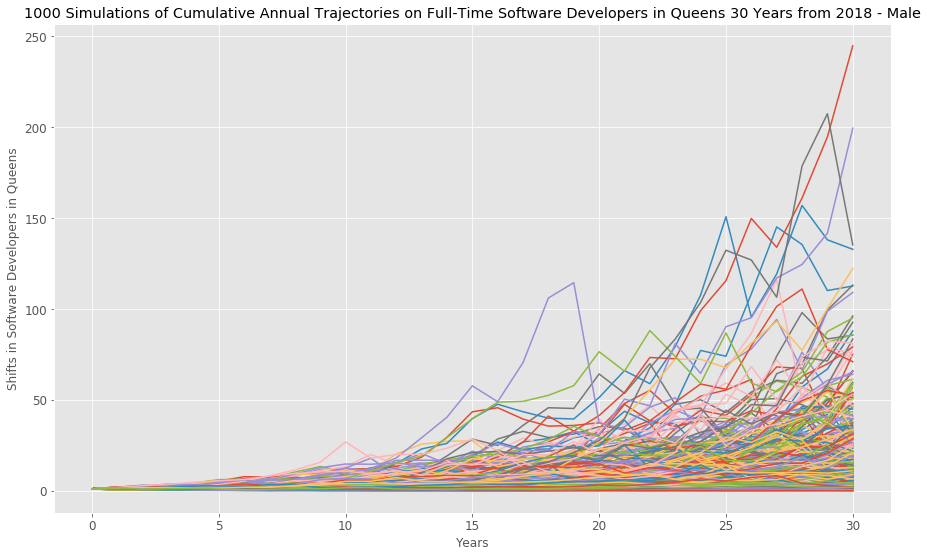

In [148]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Queens 30 Years from 2018 - Male"
software_cumulative_moves_queens.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Queens')
plt.show()

<Figure size 432x288 with 0 Axes>

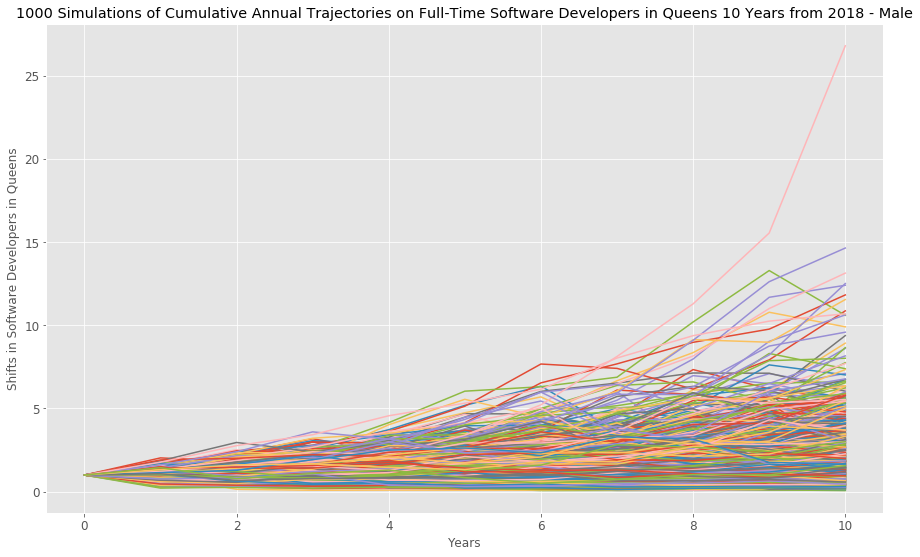

In [149]:
# Trajectories for the next 10 years
monte_carlo_cum_moves_software_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Queens 10 Years from 2018 - Male"
software_cumulative_moves_queens.iloc[0:11, :].plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Queens')
plt.show()

In [150]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_software_cumulative_moves_queens = software_cumulative_moves_queens.iloc[-1, :]
ending_software_cumulative_moves_queens.head()

0    1.820007
1    9.498383
2    1.038512
3    0.627796
4    1.112163
Name: 30, dtype: float64

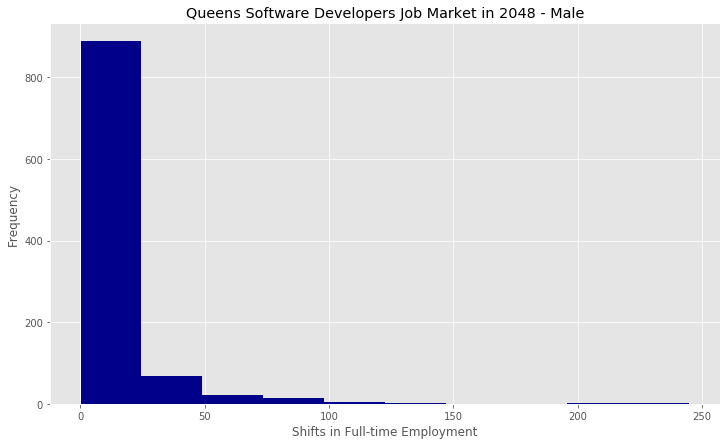

In [151]:
# Use the `plot` function to plot a frequency distribution of simulated ending employment
fig_hist_software_queens = plt.figure()
ending_software_cumulative_moves_queens.plot(kind='hist', bins=10, color = 'darkblue', 
                             title='Queens Software Developers Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [152]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_software_queens = ending_software_cumulative_moves_queens.quantile(q=[0.025, 0.975])
confidence_interval_software_queens

0.025     0.214378
0.975    65.462108
Name: 30, dtype: float64

In [153]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_software_cumulative_moves_queens.value_counts(bins=10) / len(ending_software_cumulative_moves_queens)

(-0.214, 24.516]      0.888
(24.516, 49.0]        0.068
(49.0, 73.484]        0.022
(73.484, 97.968]      0.014
(97.968, 122.452]     0.004
(122.452, 146.936]    0.002
(220.388, 244.872]    0.001
(195.904, 220.388]    0.001
(171.42, 195.904]     0.000
(146.936, 171.42]     0.000
Name: 30, dtype: float64

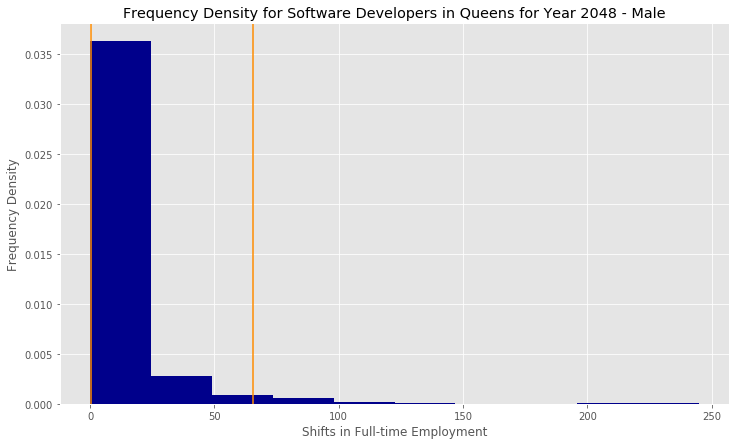

In [154]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_software_queens = plt.figure()
ending_software_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Software Developers in Queens for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_software_queens.iloc[0], color='darkorange')
plt.axvline(confidence_interval_software_queens.iloc[1], color='darkorange')
plt.show()

In [155]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_software_cumulative_moves_queens = software_cumulative_moves_queens.iloc[-20, :]
tenth_software_cumulative_moves_queens.head()

0    1.564988
1    3.700400
2    0.265791
3    0.474155
4    0.546913
Name: 11, dtype: float64

In [156]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_software_confidence_interval_queens = tenth_software_cumulative_moves_queens.quantile(q=[0.025, 0.975])
tenth_software_confidence_interval_queens

0.025    0.243894
0.975    8.308283
Name: 11, dtype: float64

In [157]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_software_cumulative_moves_queens.value_counts(bins=10) / len(tenth_software_cumulative_moves_queens)

(0.0388, 2.044]     0.566
(2.044, 4.028]      0.276
(4.028, 6.013]      0.099
(6.013, 7.997]      0.032
(7.997, 9.981]      0.014
(9.981, 11.966]     0.006
(11.966, 13.95]     0.003
(15.934, 17.919]    0.002
(17.919, 19.903]    0.001
(13.95, 15.934]     0.001
Name: 11, dtype: float64

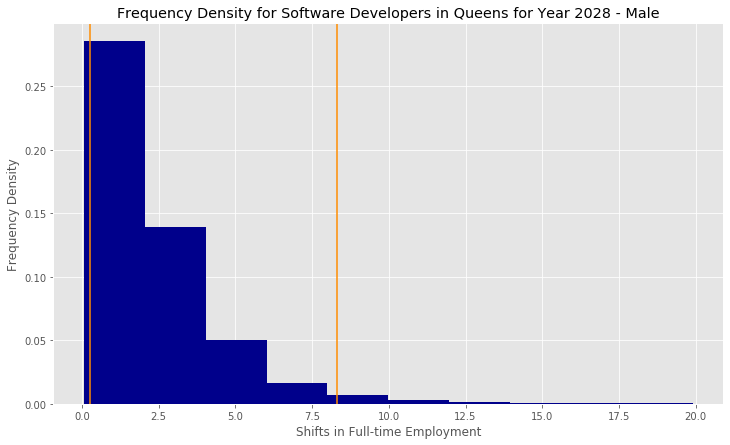

In [158]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_software_cum_moves_queens = plt.figure()
tenth_software_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Software Developers in Queens for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_software_confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(tenth_software_confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

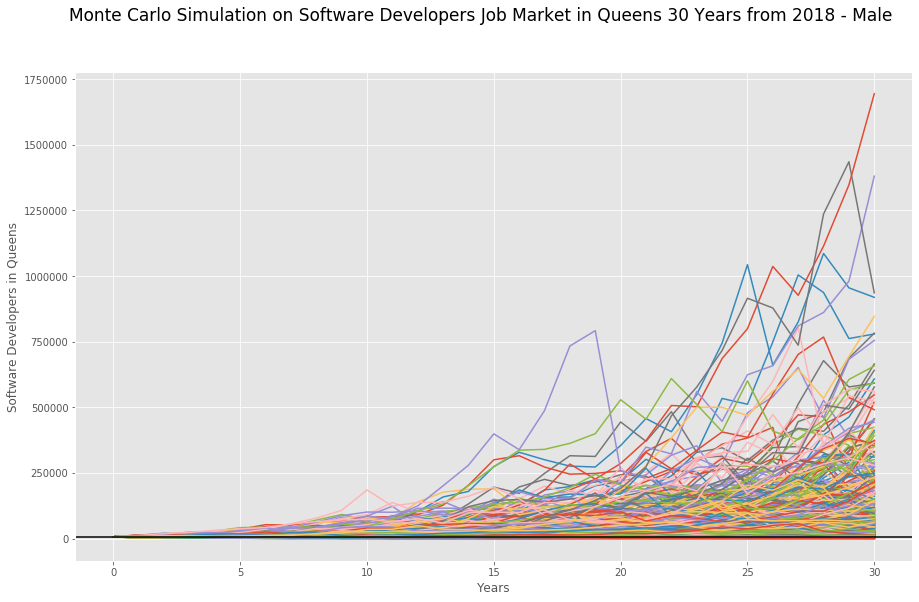

In [161]:
# Set initial employment
initial_software_queens = software_devops_male_last_queens

fig_software_queens = plt.figure(figsize=(15,9))
fig_software_queens.suptitle('Monte Carlo Simulation on Software Developers Job Market in Queens 30 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_queens * initial_software_queens)
plt.axhline(y = software_devops_male_last_queens, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_queens, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Queens')
plt.show()

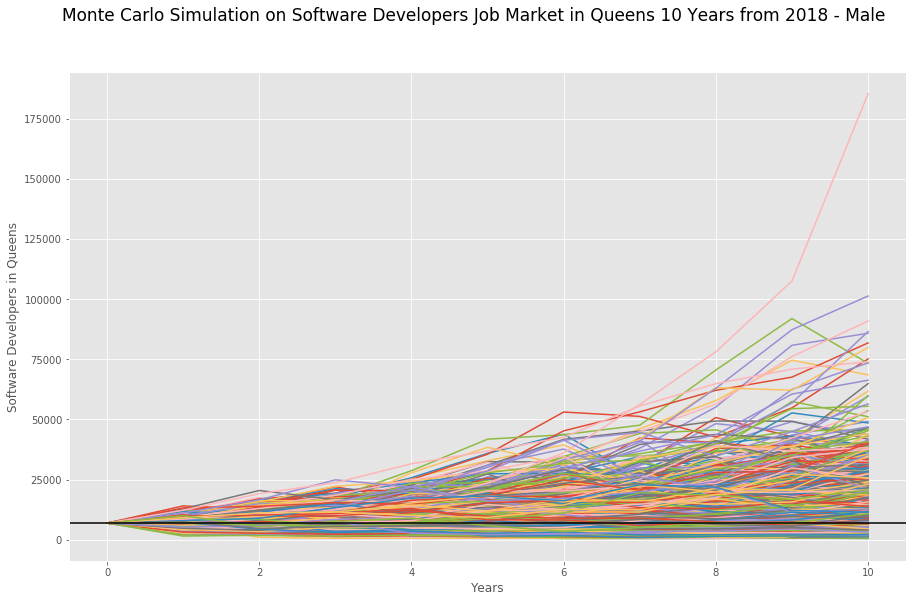

In [162]:
# Zoom in 10-year trajectories
# initial_software_queens = 0.5*(software_devops_male_last_queens + software_devops_female_last_queens)

fig_software_queens = plt.figure(figsize=(15,9))
fig_software_queens.suptitle('Monte Carlo Simulation on Software Developers Job Market in Queens 10 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_queens.iloc[0:11, :] * initial_software_queens)
plt.axhline(y = software_devops_male_last_queens, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_queens, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Queens')
plt.show()

In [163]:
# Calculate gain/loss of lower and upper bound cumulative job market in Queens
software_gnl_lower_bound_queens = initial_software_queens * confidence_interval_software_queens.iloc[0]
software_gnl_upper_bound_queens = initial_software_queens * confidence_interval_software_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_queens:,.0f} for male software developers"
      f" in Queens over the next 30 years will end within in the range of"
      f" {software_gnl_lower_bound_queens:,.0f} and {software_gnl_upper_bound_queens:,.0f}.")

There is a 95% chance that an initial employment of 6,919 for male software developers in Queens over the next 30 years will end within in the range of 1,483 and 452,932.


In [164]:
# Calculate gain/loss of lower and upper bound cumulative job market in Queens
tenth_software_gnl_lower_bound_queens = initial_software_queens * tenth_software_confidence_interval_queens.iloc[0]
tenth_software_gnl_upper_bound_queens = initial_software_queens * tenth_software_confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_queens:,.0f} for male software developers"
      f" in Queens over the next 10 years will end within in the range of"
      f" {tenth_software_gnl_lower_bound_queens:,.0f} and {tenth_software_gnl_upper_bound_queens:,.0f}.")

There is a 95% chance that an initial employment of 6,919 for male software developers in Queens over the next 10 years will end within in the range of 1,688 and 57,485.


In [165]:
software_trajectories_queens = initial_software_queens * software_cumulative_moves_queens.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
software_trajectories_queens.columns = ['Lower 5%', 'Median', 'Upper 5%']
software_trajectories_queens

Lower 5%        Median       Upper 5%
0   6919.000000   6919.000000    6919.000000
1   4562.568811   7562.933415   10468.700512
2   3872.554477   7882.660008   13016.366346
3   3686.085715   8121.545389   15637.668204
4   3193.334211   8769.081347   17841.573479
5   3051.502419   9029.587810   20993.607975
6   3006.922029   9120.783267   24579.102469
7   2738.439023   9552.184316   26789.183457
8   2621.043348  10220.595212   30549.601246
9   2443.460687  10775.888975   36184.310391
10  2519.216525  11501.594394   38666.764846
11  2611.999389  12413.251331   43591.417301
12  2586.721234  13248.564853   49942.023354
13  2584.961414  13725.042117   58866.602200
14  2472.966311  14252.897616   60203.800496
15  2673.744512  15352.294742   70193.830412
16  2546.055888  15754.442142   76680.638470
17  2576.760720  16554.704410   86095.657505
18  2623.964656  17515.583544   96770.225962
19  2337.487815  18304.640680  104328.209713
20  2293.491119  19578.626917  112967.519417
21  2170.902270  19984.553722  128933.467712
22  2423.979549  21816.736556  139787.664587
23  2480.090160  22280.851059  152955.788323
24  2602.494527  23198.393690  161557.057834
25  2563.948674  24561.822162  177854.294653
26  2653.659909  25723.738503  185320.798834
27  2632.810002  26145.024458  223486.475486
28  2514.470199  27143.004482  275723.295981
29  2640.910430  28037.798340  281210.742034
30  2599.431743  28819.650444  310956.168709

<Figure size 432x288 with 0 Axes>

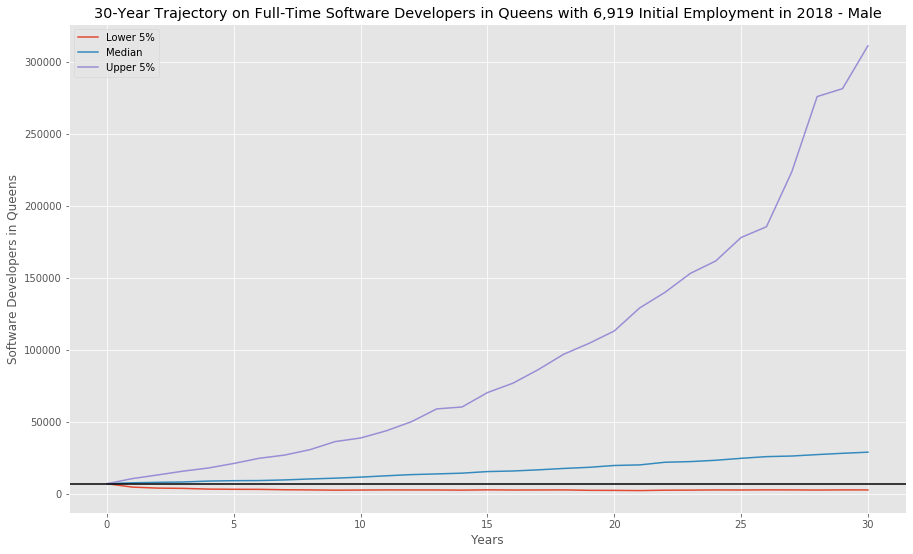

In [168]:
ax_cum_software_queens = plt.figure()
software_trajectories_queens.plot(title="30-Year Trajectory on Full-Time Software Developers in Queens with 6,919 Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = software_devops_male_last_queens, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_queens, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Queens')
plt.show()

<Figure size 432x288 with 0 Axes>

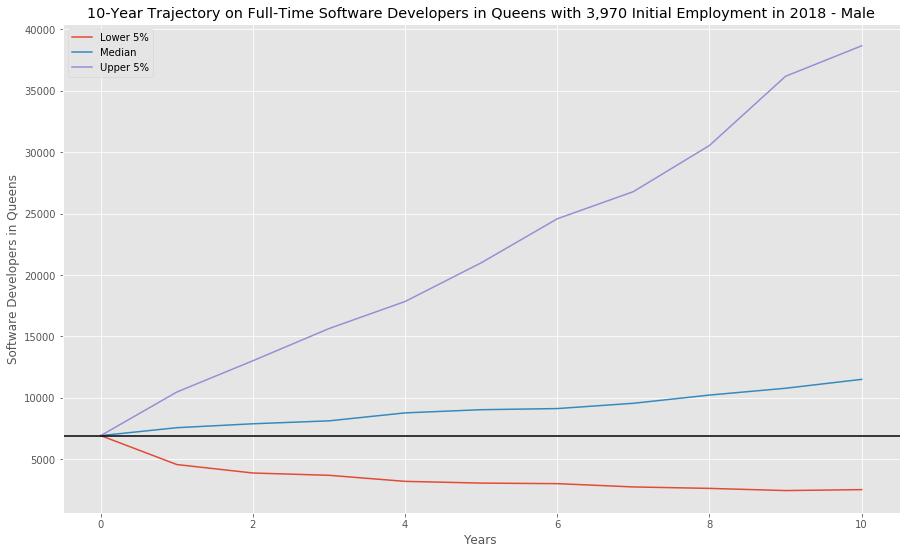

In [169]:
ax_cum_software_queens_decade = plt.figure()
software_trajectories_queens.iloc[0:11, :].plot(title="10-Year Trajectory on Full-Time Software Developers in Queens with 3,970 Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = software_devops_male_last_queens, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_queens, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Queens')
plt.show()

### Monte Carlo Simulation on Full-Time Software Developers in Staten Island Over 30 Years Starting from 2018

In [170]:
software_df_staten = software_devops_Staten_Island
software_df_staten

Software_devops_male  \
County Year Name                                              
085    2010 Richmond County, New York                 995.0   
       2011 Richmond County, New York                1078.0   
       2012 Richmond County, New York                1115.0   
       2013 Richmond County, New York                 999.0   
       2014 Richmond County, New York                 725.0   
       2015 Richmond County, New York                1234.0   
       2016 Richmond County, New York                1309.0   
       2017 Richmond County, New York                2311.0   
       2018 Richmond County, New York                2118.0   

                                       Software_devops_female  
County Year Name                                               
085    2010 Richmond County, New York                   765.0  
       2011 Richmond County, New York                   596.0  
       2012 Richmond County, New York                   746.0  
       2013 Richmond County, New York                   660.0  
       2014 Richmond County, New York                   633.0  
       2015 Richmond County, New York                   330.0  
       2016 Richmond County, New York                   355.0  
       2017 Richmond County, New York                   442.0  
       2018 Richmond County, New York                   269.0

In [171]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_software_staten = software_df_staten.pct_change().fillna(0)
annual_moves_software_staten

Software_devops_male  \
County Year Name                                              
085    2010 Richmond County, New York              0.000000   
       2011 Richmond County, New York              0.083417   
       2012 Richmond County, New York              0.034323   
       2013 Richmond County, New York             -0.104036   
       2014 Richmond County, New York             -0.274274   
       2015 Richmond County, New York              0.702069   
       2016 Richmond County, New York              0.060778   
       2017 Richmond County, New York              0.765470   
       2018 Richmond County, New York             -0.083514   

                                       Software_devops_female  
County Year Name                                               
085    2010 Richmond County, New York                0.000000  
       2011 Richmond County, New York               -0.220915  
       2012 Richmond County, New York                0.251678  
       2013 Richmond County, New York               -0.115282  
       2014 Richmond County, New York               -0.040909  
       2015 Richmond County, New York               -0.478673  
       2016 Richmond County, New York                0.075758  
       2017 Richmond County, New York                0.245070  
       2018 Richmond County, New York               -0.391403

In [172]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_software_devops_male_staten = annual_moves_software_staten.mean()['Software_devops_male']
avg_annual_moves_software_devops_female_staten = annual_moves_software_staten.mean()['Software_devops_female']
avg_annual_moves_software_devops_male_staten

0.131581430439857

In [173]:
avg_annual_moves_software_devops_female_staten

-0.07496394166684989

In [174]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_software_devops_male_staten = annual_moves_software_staten.std()['Software_devops_male']
std_dev_annual_moves_software_devops_female_staten = annual_moves_software_staten.std()['Software_devops_female']
std_dev_annual_moves_software_devops_male_staten

0.35844745468602085

In [175]:
std_dev_annual_moves_software_devops_female_staten

0.2560895529900319

In [176]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
software_devops_male_last_staten = software_df_staten['Software_devops_male'][-1]
software_devops_female_last_staten = software_df_staten['Software_devops_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_software_df_staten = pd.DataFrame()
software_cumulative_moves_staten = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_software_devop_male_staten = []
    simulated_software_devop_female_staten = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_software_devops_male_staten = [software_devops_male_last_staten]
    simulated_software_devops_female_staten = [software_devops_female_last_staten]
       
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_software_devop_male_staten = simulated_software_devops_male_staten[count] * (1 + np.random.normal(avg_annual_moves_software_devops_male_staten, std_dev_annual_moves_software_devops_male_staten))
        simulated_software_devop_female_staten = simulated_software_devops_female_staten[count] * (1 + np.random.normal(avg_annual_moves_software_devops_female_staten, std_dev_annual_moves_software_devops_female_staten))

        simulated_software_devops_male_staten.append(simulated_software_devop_male_staten)
        simulated_software_devops_female_staten.append(simulated_software_devop_female_staten)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_software_df_staten['Software_devops_male'] = simulated_software_devops_male_staten
    simulated_software_df_staten['Software_devops_female'] = simulated_software_devops_female_staten
    
    # Calculate the daily returns of simulated prices
    simulated_software_moves_staten = simulated_software_df_staten.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    software_annual_moves_staten = simulated_software_moves_staten.dot(weights)
    
    # Calculate the normalized, cumulative return series
    software_cumulative_moves_staten[n] = (1 + software_annual_moves_staten.fillna(0)).cumprod()

# Print records from the DataFrame
software_cumulative_moves_staten

0           1           2          3         4         5    \
0    1.000000    1.000000    1.000000   1.000000  1.000000  1.000000   
1    1.566193    1.318054    1.209541   1.326292  0.892199  0.875412   
2    2.088157    1.500522    1.514239   1.376077  1.492759  0.791491   
3    2.883786    1.349576    1.921296   1.300424  1.174091  0.799641   
4    3.531631    2.390171    1.429852   1.270330  1.841587  0.816146   
5    2.313855    3.117716    2.011467   1.055500  1.465110  1.284352   
6    2.394331    4.578489    1.224606   1.348504  0.963690  0.993272   
7    2.550766    6.381697    1.738582   0.958684  0.996251  1.120300   
8    1.222102   11.222723    1.612723   1.302023  0.937163  1.135332   
9    0.983653   17.164202    1.742026   1.865216  0.420006  1.406815   
10   1.026553   15.708556    1.362411   2.655896  0.464960  0.972089   
11   0.883535   20.809609    2.181074   4.902574  0.340629  1.493755   
12   1.395097   36.002024    3.357897   3.441295  0.448912  1.247421   
13   1.021837   36.083579    2.997162   4.171214  0.596822  1.345798   
14   1.355270   14.089477    4.159420   8.586024  0.796839  1.040959   
15   1.693572   25.054455    6.807930   8.052903  0.885174  1.236677   
16   2.159209   39.826289   12.688436  10.106115  1.485024  2.294117   
17   2.264394   34.410684   17.360808   5.305290  1.222161  3.490984   
18   2.192492   49.679880   25.993276   6.577539  1.569505  6.748050   
19   2.677009   75.153561   28.378684   6.079421  2.175601  8.295176   
20   2.006805   63.516080   37.617470  10.615572  2.493594  1.406900   
21   2.496124   89.375774   44.327694   5.236724  3.383734  1.009245   
22   3.619471  125.412691   50.238395   8.060357  3.761758  1.409087   
23   4.853471   94.760702   52.488090  14.616913  1.520052  1.851985   
24   7.714438   94.390231   82.179843  15.965943  2.481147  1.312012   
25   9.462560  118.151540  109.364635  18.544838  3.143051  1.656674   
26  10.376062   95.736918  190.529092  26.939212  4.283368  1.648420   
27   3.763644   94.321842  170.989166  20.849984  3.490116  1.325389   
28   3.962478   53.304639  269.030426  37.265966  4.463391  2.034025   
29   5.893617   27.906244  279.126338  45.893723  2.870541  1.799364   
30   3.402375   45.817366  328.890805  47.640240  3.391948  1.604620   

          6           7           8          9    ...        990        991  \
0    1.000000    1.000000    1.000000   1.000000  ...   1.000000   1.000000   
1    1.165393    1.953233    1.255508   0.298872  ...   1.468089   1.624364   
2    0.833673    2.984220    2.010708   0.403702  ...   1.325801   0.976836   
3    1.545674    3.637075    1.589677   0.418122  ...   2.470239   0.972820   
4    1.985925    4.439016    1.470498   0.498132  ...   3.016171   0.852411   
5    2.640528    8.296331    1.282096   0.445017  ...   3.143273   0.822221   
6    2.056040   11.399616    1.364708   0.446307  ...   3.792550   0.883978   
7    2.992695   12.154325    2.270816   0.709434  ...   3.864785   1.475831   
8    3.724539   13.164707    3.331695   1.293372  ...   3.242537   1.383524   
9    5.962661   18.377105    6.691490   1.549821  ...   4.190807   2.448454   
10   6.884695   27.185184    7.386064   1.992608  ...   2.517126   3.130016   
11   9.003736   41.588482    8.612513   3.147539  ...   3.829367   3.799682   
12  10.685316   58.805835    8.002804   4.356407  ...   5.776058   4.168250   
13  11.129609   37.644807    9.257126   4.242207  ...   7.321572   4.888973   
14  12.381327   49.985100   20.227247   7.649133  ...   9.277482   5.857108   
15  17.357248   38.241451   17.997017   8.110120  ...  12.648694   6.218217   
16  13.457637   23.196497   23.906809  12.545574  ...  15.932377   8.518729   
17   5.802814   29.051279   34.991000  12.947614  ...  18.506811   5.225647   
18   4.538507   37.702349   49.189277  16.371111  ...  25.665523   3.669444   
19   6.969825   48.994007   59.282538  18.239021  ...  17.754599   5.429609   
20   5.851976   52.394974   72.919772  22.6859

<Figure size 432x288 with 0 Axes>

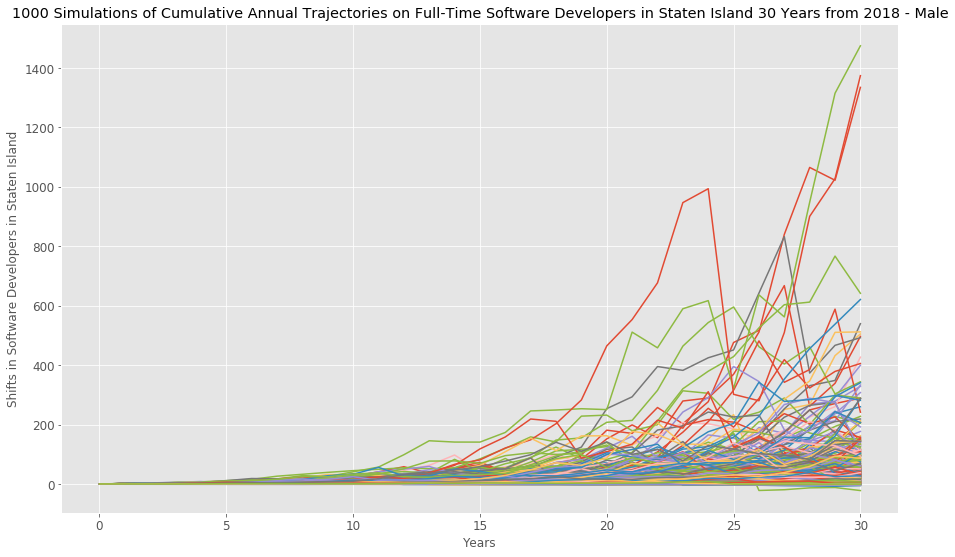

In [178]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_software_staten = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Staten Island 30 Years from 2018 - Male"
software_cumulative_moves_staten.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Staten Island')
plt.show()

<Figure size 432x288 with 0 Axes>

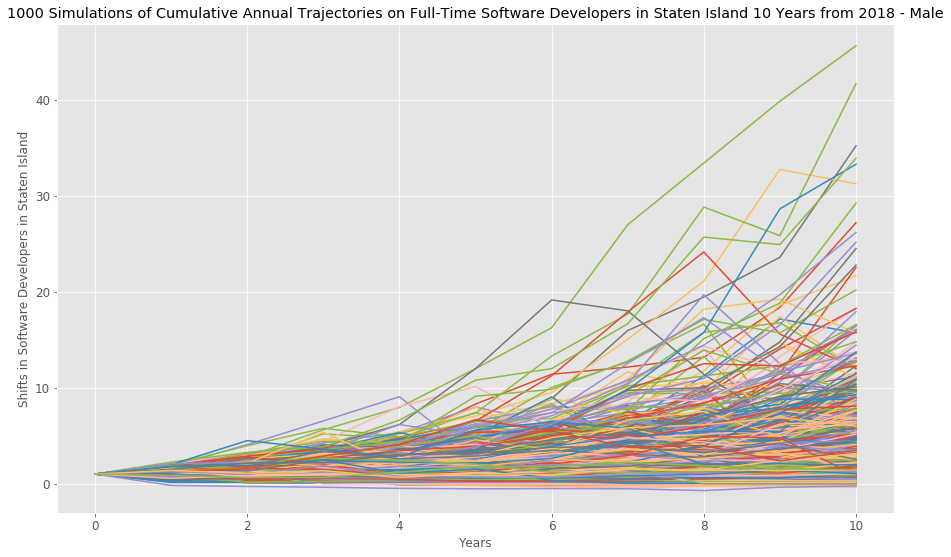

In [179]:
# Trajectories for the next 10 years
monte_carlo_cum_moves_software_staten_decade = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Software Developers in Staten Island 10 Years from 2018 - Male"
software_cumulative_moves_staten.iloc[0:11, :].plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Software Developers in Staten Island')
plt.show()

In [180]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_software_cumulative_moves_staten = software_cumulative_moves_staten.iloc[-1, :]
ending_software_cumulative_moves_staten.head()

0      3.402375
1     45.817366
2    328.890805
3     47.640240
4      3.391948
Name: 30, dtype: float64

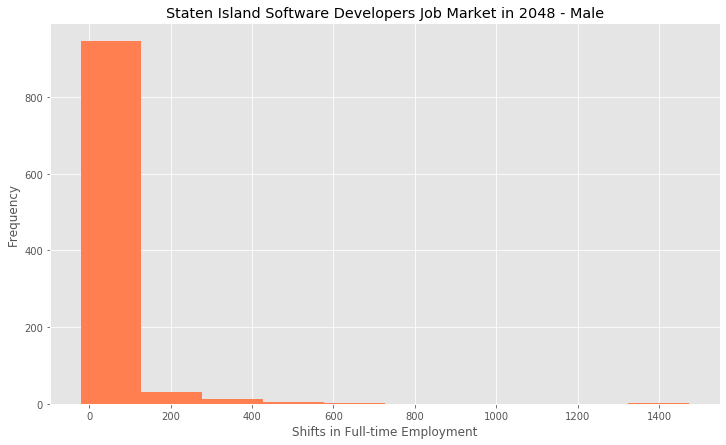

In [182]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_software_staten = plt.figure()
ending_software_cumulative_moves_staten.plot(kind='hist', bins=10, color = 'coral', 
                             title='Staten Island Software Developers Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [183]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_software_staten = ending_software_cumulative_moves_staten.quantile(q=[0.025, 0.975])
confidence_interval_software_staten

0.025      0.001262
0.975    228.564282
Name: 30, dtype: float64

In [184]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_software_cumulative_moves_staten.value_counts(bins=10) / len(ending_software_cumulative_moves_staten)

(-22.864, 128.189]      0.945
(128.189, 277.745]      0.032
(277.745, 427.301]      0.013
(427.301, 576.857]      0.005
(1324.637, 1474.192]    0.003
(576.857, 726.413]      0.002
(1175.081, 1324.637]    0.000
(1025.525, 1175.081]    0.000
(875.969, 1025.525]     0.000
(726.413, 875.969]      0.000
Name: 30, dtype: float64

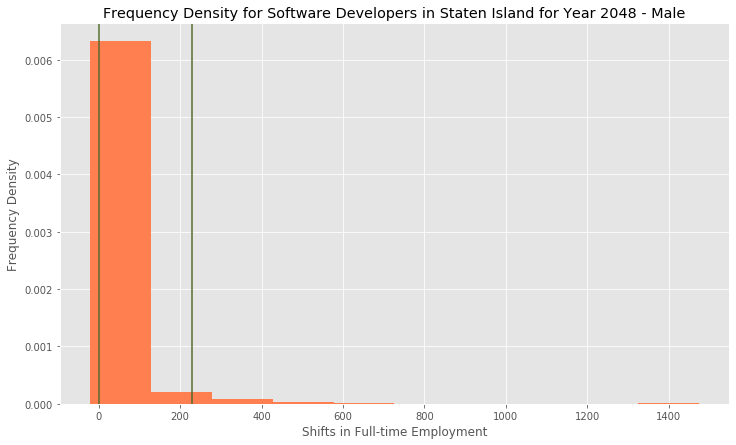

In [185]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_software_staten = plt.figure()
ending_software_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Software Developers in Staten Island for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_software_staten.iloc[0], color='darkolivegreen')
plt.axvline(confidence_interval_software_staten.iloc[1], color='darkolivegreen')
plt.show()

In [186]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_software_cumulative_moves_staten = software_cumulative_moves_staten.iloc[-20, :]
tenth_software_cumulative_moves_staten.head()

0     0.883535
1    20.809609
2     2.181074
3     4.902574
4     0.340629
Name: 11, dtype: float64

In [187]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_software_confidence_interval_staten = tenth_software_cumulative_moves_staten.quantile(q=[0.025, 0.975])
tenth_software_confidence_interval_staten

0.025     0.061399
0.975    20.577455
Name: 11, dtype: float64

In [188]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_software_cumulative_moves_staten.value_counts(bins=10) / len(tenth_software_cumulative_moves_staten)

(-0.755, 5.135]     0.766
(5.135, 10.965]     0.160
(10.965, 16.796]    0.039
(16.796, 22.626]    0.019
(22.626, 28.457]    0.005
(28.457, 34.288]    0.004
(51.779, 57.61]     0.002
(40.118, 45.949]    0.002
(34.288, 40.118]    0.002
(45.949, 51.779]    0.001
Name: 11, dtype: float64

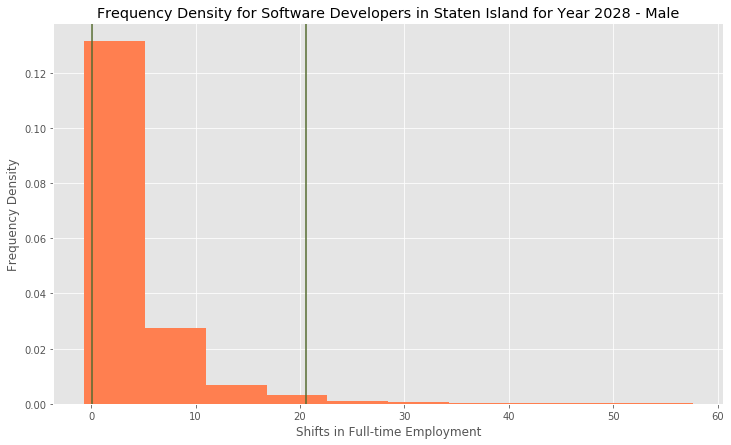

In [189]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_software_cum_moves_staten = plt.figure()
tenth_software_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Software Developers in Staten Island for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_software_confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(tenth_software_confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

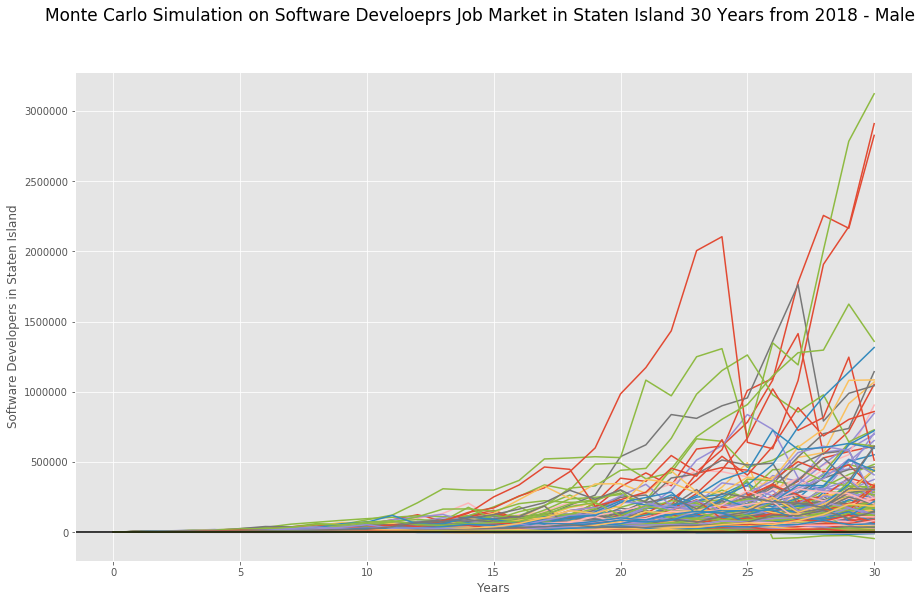

In [192]:
# Set initial employment
initial_software_staten = software_devops_male_last_staten 

fig_software_staten = plt.figure(figsize=(15,9))
fig_software_staten.suptitle('Monte Carlo Simulation on Software Develoeprs Job Market in Staten Island 30 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_staten * initial_software_staten)
plt.axhline(y = software_devops_male_last_staten, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_staten, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Staten Island')
plt.show()

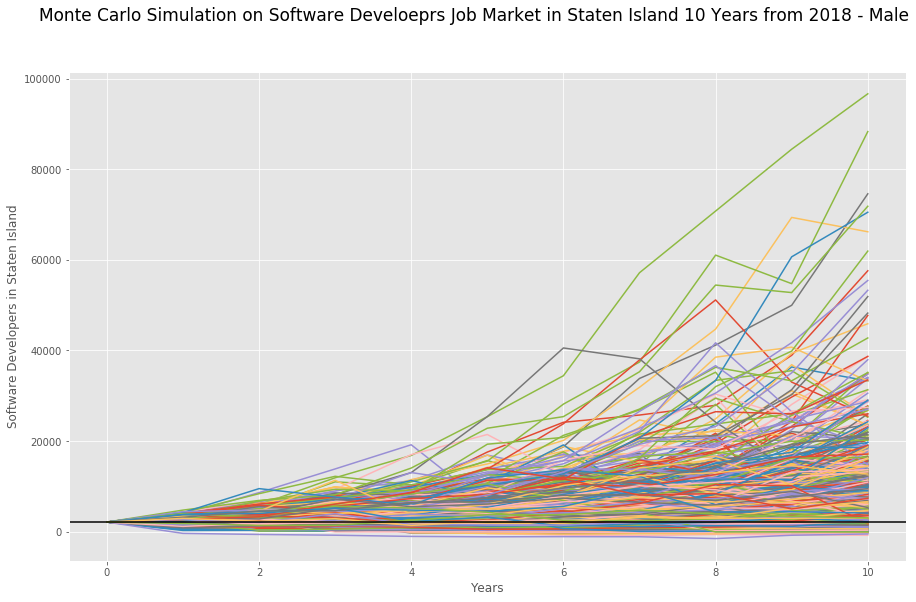

In [191]:
# Zooming in for the next 10 years from 2018
fig_software_staten = plt.figure(figsize=(15,9))
fig_software_staten.suptitle('Monte Carlo Simulation on Software Develoeprs Job Market in Staten Island 10 Years from 2018 - Male', fontsize=17)
plt.plot(software_cumulative_moves_staten.iloc[0:11, :] * initial_software_staten)
plt.axhline(y = software_devops_male_last_staten, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_staten, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Staten Island')
plt.show()

In [193]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
software_gnl_lower_bound_staten = initial_software_staten * confidence_interval_software_staten.iloc[0]
software_gnl_upper_bound_staten = initial_software_staten * confidence_interval_software_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_staten:,.0f} for male software developers"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {software_gnl_lower_bound_staten:,.0f} and {software_gnl_upper_bound_staten:,.0f}.")

There is a 95% chance that an initial employment of 2,118 for male software developers in Staten Island over the next 30 years will end within in the range of 3 and 484,099.


In [200]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_software_gnl_lower_bound_staten = initial_software_staten * tenth_software_confidence_interval_staten.iloc[0]
tenth_software_gnl_upper_bound_staten = initial_software_staten * tenth_software_confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_software_staten:,.0f} for male software developers"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {tenth_software_gnl_lower_bound_staten:,.0f} and {tenth_software_gnl_upper_bound_staten:,.0f}.")

There is a 95% chance that an initial employment of 2,118 for male software developers in Staten Island over the next 30 years will end within in the range of 130 and 43,583.


In [201]:
software_trajectories_staten = initial_software_staten * software_cumulative_moves_staten.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
software_trajectories_staten.columns = ['Lower 5%', 'Median', 'Upper 5%']
software_trajectories_staten

Lower 5%        Median       Upper 5%
0   2118.000000   2118.000000    2118.000000
1   1278.863222   2371.426431    3674.135906
2    996.819660   2537.119024    5173.958862
3    907.425564   2777.617982    6396.150298
4    720.287603   3004.996233    7800.659463
5    636.723899   3169.503997    9920.526796
6    548.888934   3354.536261   12243.790660
7    523.327868   3573.237136   14175.996004
8    433.357629   3723.761361   16676.710981
9    405.557500   3935.120669   19977.985036
10   386.742391   4206.455912   24271.527008
11   370.736946   4615.834598   28026.032907
12   396.177981   5045.130981   32225.720174
13   412.239059   5222.108561   38369.400474
14   388.006214   5341.571293   43004.032078
15   324.848103   5621.365582   49281.480757
16   335.160306   5712.315614   60586.070547
17   357.713020   6314.784450   66926.645724
18   306.895842   6847.234884   72111.865676
19   275.927360   7156.913644   81592.207709
20   256.878411   7458.110418   97750.271346
21   243.612529   7773.226608  101990.162229
22   262.064426   9167.207065  131507.469652
23   226.588781   9459.179486  146981.993164
24   268.573610  10040.720262  155456.837223
25   228.967227  10622.184369  174067.312040
26   207.779836  11132.411877  205999.125887
27   243.122631  11526.255449  206116.085428
28   276.017897  13020.944155  220309.463008
29   273.304899  12882.376335  279213.716061
30   277.254108  13841.943584  289080.822158

<Figure size 432x288 with 0 Axes>

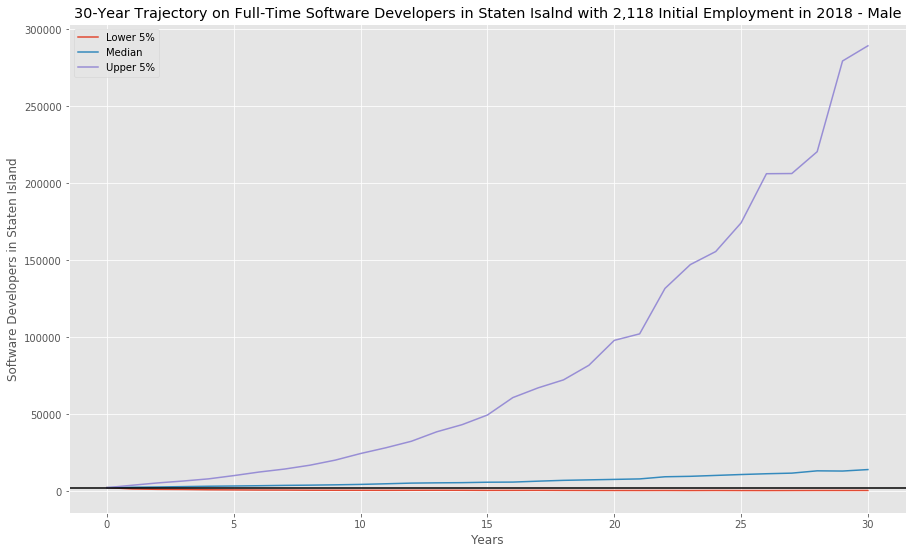

In [202]:
ax_cum_employed_staten = plt.figure()
software_trajectories_staten.plot(title="30-Year Trajectory on Full-Time Software Developers in Staten Isalnd with 2,118 Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = software_devops_male_last_staten, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_staten, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Staten Island')
plt.show()

<Figure size 432x288 with 0 Axes>

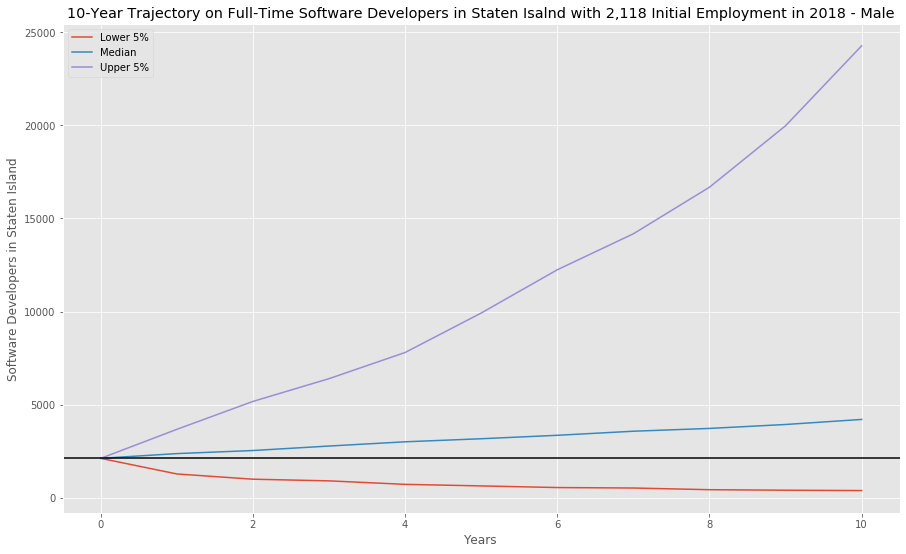

In [203]:
# 10-year Confidence Interval Trajectory
ax_cum_employed_staten = plt.figure()
software_trajectories_staten.iloc[0:11, :].plot(title="10-Year Trajectory on Full-Time Software Developers in Staten Isalnd with 2,118 Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = software_devops_male_last_staten, color = 'black', linestyle = '-')
# plt.axhline(y = software_devops_female_last_staten, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Software Developers in Staten Island')
plt.show()